# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
import warnings
import csv
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, normalized_mutual_info_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
pd.set_option('display.max_columns', 300)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
plt.rcParams["font.family"] = "STIXGeneral"

In [3]:
with open('../notebooks-and-scripts/helpers/feature_key.csv') as csvfile:
    reader = csv.reader(csvfile)
    feature_key = dict()
    for row in reader:
        feature_key[row[0]] = row[1]

In [3]:
def wrap_text(in_string, num = 15):
    out_string = str()
    counter = 0
    for char in in_string:
        if char == ' ' and counter > num:
            out_string = out_string + '\n'
            counter = 0
        else:
            out_string = out_string + char
            counter = counter + 1
    return out_string

# Basic Info

In [2]:
df_orig = pd.read_csv('../data/anes_cdf_converted.csv')
df_orig.head()

Unnamed: 0  year   age congressional_district state  gender  weight  \
0           0  2000  49.0                   MN01    MN       0  1.2886   
1           1  2000  35.0                   MI01    MI       1  0.8959   
2           2  2000  57.0                   IL11    IL       1  1.0454   
3           3  2000  63.0                   ME02    ME       0  0.6005   
4           4  2000  40.0                   MA01    MA       1  1.9270   

   final_vote  VCF0108  VCF0113  VCF0127  VCF0143  VCF0146  VCF0311  VCF0346  \
0           2      0.0        0        0      1.0      1.0      1.0      1.0   
1           0      0.0        0        0      1.0      1.0      0.0      1.0   
2           1      0.0        0        0      1.0      1.0      1.0      0.0   
3           1      0.0        0        1      0.0      1.0      1.0      0.0   
4           2      0.0        0        0      1.0      1.0      1.0      1.0   

   VCF0347  VCF0348  VCF0349  VCF0358  VCF0359  VCF0360  VCF0361  VCF0370  \
0      1.0      0.0      0.0      0.0      1.0      0.0      1.0      1.0   
1      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2      0.0      1.0      1.0      0.0      0.0      1.0      1.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      0.0      1.0      1.0      0.0      1.0      1.0      1.0      0.0   

   VCF0371  VCF0372  VCF0373  VCF0374  VCF0380  VCF0386  VCF0392  VCF0475  \
0      0.0      1.0      1.0      1.0      1.0      1.0      0.0      1.0   
1      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2      1.0      1.0      0.0      1.0      0.0      1.0      0.0      1.0   
3      0.0      1.0      0.0      0.0      1.0      1.0      1.0      0.0   
4      0.0      1.0      1.0      0.0      1.0      1.0      0.0      0.0   

   VCF0481  VCF0487  VCF0493  VCF0450  VCF0501  VCF0702  VCF0704a  VCF0707  \
0      1.0      1.0      0.0      0.0      1.0        1       0.0      0.0   
1      0.0      0.0      0.0      1.0      1.0        0       NaN      NaN   
2      1.0      0.0      1.0      1.0      0.0        1       1.0      NaN   
3      0.0      0.0      0.0      1.0      0.0        1       1.0      1.0   
4      1.0      1.0      0.0      1.0      1.0        1       0.0      1.0   

   VCF0708  VCF0717  VCF0718  VCF0719  VCF0720  VCF0721  VCF0724  VCF0729  \
0      0.0      1.0      0.0      0.0      0.0      0.0      1.0      1.0   
1      NaN      0.0      0.0      0.0      0.0      1.0      1.0      0.0   
2      NaN      1.0      0.0      0.0      0.0      0.0      1.0      1.0   
3      1.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      1.0      1.0   

   VCF0731  VCF0740  VCF0741  VCF0742  VCF0846  VCF0878  VCF0905  VCF9021  \
0      1.0      0.0      0.0      0.0      1.0      0.0      1.0      1.0   
1      1.0      0.0      0.0      1.0      0.0      1.0      1.0      1.0   
2      1.0      0.0      0.0      0.0      1.0      1.0      1.0      0.0   
3      1.0      0.0      0.0      0.0      1.0      0.0      1.0      0.0   
4      1.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   

   VCF9029  VCF9030a  VCF9030b  VCF9030c  VCF9031  VCF0204_dk  VCF0204  \
0      NaN       1.0       0.0       1.0      0.0       False      8.0   
1      NaN       0.0       0.0       0.0      0.0       False     10.0   
2      NaN       0.0       0.0       0.0      0.0       False      8.0   
3      NaN       1.0       1.0       1.0      0.0       False      5.0   
4      NaN       1.0       1.0       0.0      0.0       False      8.0   

   VCF0206_dk  VCF0206  VCF0207_dk  VCF0207  VCF0209_dk  VCF0209  VCF0210_dk  \
0       False      8.0       False      8.0       False      7.0       False   
1       False     10.0       False     10.0       False     10.0       False   
2       False      8.0       False      8.0       False      6.0       

2000     718
2004    1066
2008    2102
2012    5488
Name: year, dtype: int64


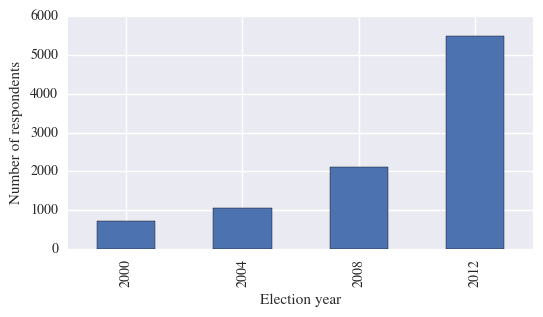

In [158]:
print(df_orig.year.value_counts().sort_index())
fig, axes = plt.subplots(1, 1, figsize = (6,3))
g = df_orig.year.value_counts().sort_index().plot(kind = 'bar', ax = axes)
g.set_ylabel('Number of respondents')
g.set_xlabel('Election year')

There is an unfortunate abundance of 2012 data that must be held out for the test set, leaving the training set with a little under 4000 respondents. Though not ideal, this should still be a sufficient number of training examples to build a classification model.

In [7]:
df = df_orig[df_orig.year < 2012]
columns_to_drop = ['VCF0734','VCF0736','VCF1011','VCF0704','VCF0710','VCF0709','VCF0703','VCF0707','VCF0708','VCF1011']
for column in columns_to_drop:
    df = df.iloc[:, ~df.columns.str.contains(column)]

# Assessing generalizability

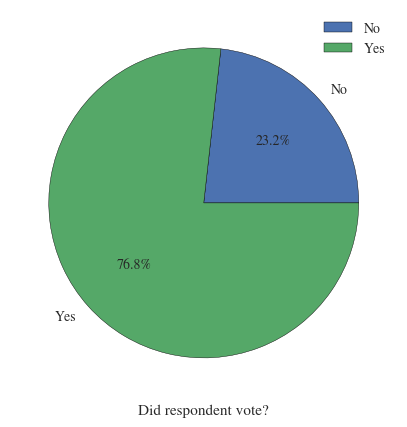

In [161]:
fig = plt.figure(figsize = (5,5))
g = df.VCF0702.value_counts().sort_index().plot(kind = 'pie', labels = ['No','Yes'], autopct='%1.1f%%')
g.set(xlabel = 'Did respondent vote?', ylabel = ' ')
plt.legend(labels = ['No','Yes'])

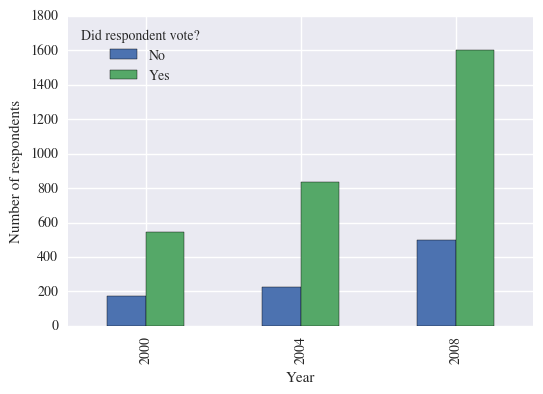

In [162]:
df_temp = df.groupby([df.year, df.VCF0702]).size()
df_temp = df_temp.unstack('VCF0702')
g = df_temp.plot(kind = 'bar')
g.set(xlabel = 'Year', ylabel = 'Number of respondents')
g.legend(['No','Yes'], loc = 0, title = 'Did respondent vote?')

The good news is that it appears voter turnout is consistent across election years. The less-good news is that the dataset is fairly unbalanced, so metrics like classification accuracy become less meaningful while [F1 scores](https://en.wikipedia.org/wiki/F1_score) and [ROC curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) take on greater importance. The actual proportion of voters who claim to have voted is suspiciously high. The ANES surveys poll from a sample universe of [**eligible voters**](http://www.electproject.org/home/voter-turnout/faq/denominator) rather than **registered voters**, so one expects the survey's data on turnout rate to mirror [widely-accepted turnout statistics](http://www.fairvote.org/voter_turnout#voter_turnout_101) that show turnout rates between 50% and 60% of the voting eligible population. Instead the ANES surveys have turnout closer to 80%.

Let's check that this is not a result of disregarding sampling weights.

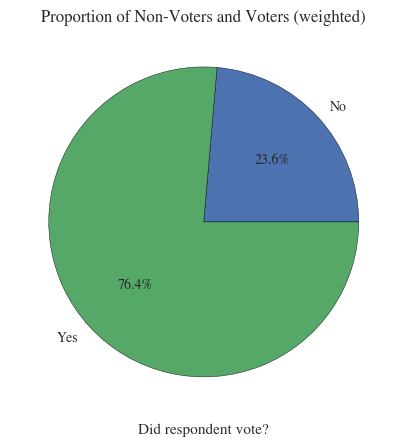

In [163]:
fig, axes = plt.subplots(1, 1, figsize = (5, 5))

df.groupby('VCF0702').sum().weight.plot(kind = 'pie', ax = axes, labels = ['No','Yes'], autopct='%1.1f%%')
axes.set(title = 'Proportion of Non-Voters and Voters (weighted)', xlabel = 'Did respondent vote?', ylabel = '')

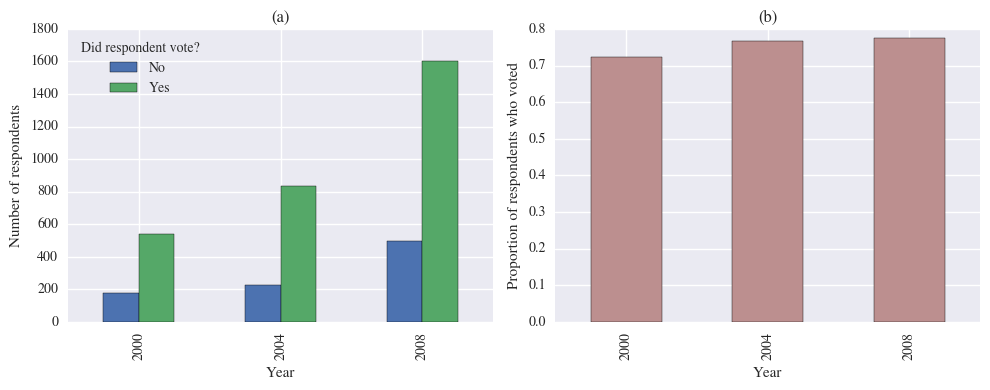

In [164]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

df_temp = df.groupby([df.year, df.VCF0702]).size()
df_temp = df_temp.unstack('VCF0702')
g = df_temp.plot(kind = 'bar', ax = axes[0])
g.set(xlabel = 'Year', ylabel = 'Number of respondents', title = '(a)')
g.legend(['No','Yes'], loc = 0, title = 'Did respondent vote?')

table = df.groupby(['VCF0702','year']).sum().weight.unstack('year')
total = table.loc[0,:] + table.loc[1,:]
votes = table.loc[1,:]
g = (votes / total).plot(kind = 'bar', ax = axes[1], color = 'rosybrown')
g.set(title = '(b)', xlabel = 'Year',
      ylabel = 'Proportion of respondents who voted')

plt.tight_layout()

In [165]:
votes / total

year
2000    0.723365
2004    0.765557
2008    0.776110
dtype: float64

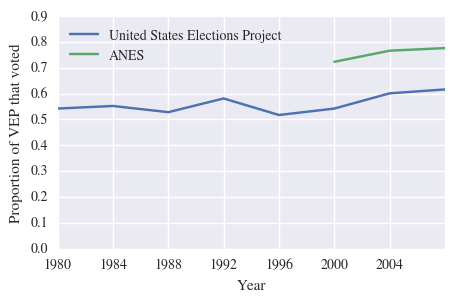

In [166]:
turnout = pd.read_csv('VEP_turnout.csv')
turnout = turnout.iloc[:, [0,1]]
turnout.columns = ['year','turnout']

x = turnout.year
y = (turnout.turnout) / 100

plt.figure(figsize = (5,3))
plt.plot(x, y)
plt.plot([2000, 2004, 2008], [.723, .766, .776])
plt.xlim(1980, 2008)
plt.xticks(np.arange(1980, 2008, 4))
plt.xlabel('Year')
plt.ylabel('Proportion of VEP that voted')
plt.legend(['United States Elections Project', 'ANES'], loc = 0)

In [167]:
columns_to_drop = ['year','Unnamed: 0','congressional_district','state']
X = df.drop(columns_to_drop, axis = 1)

columns_to_drop = ['VCF9048','VCF0804','VCF0823','VCF0138','VCF9085','VCF0734','VCF0803','VCF0879','VCF9021',
                  'VCF9047','VCF9093','VCF9009','VCF0429','VCF9084','VCF0879','VCF0233','VCF9086','VCF0219',
                  'VCF9030','VCF9017','VCF9016','VCF9092','VCF9087','VCF9048','VCF9029','VCF0502','VCF0541',
                  'VCF0542','VCF9089','VCF0909','VCF0904','VCF0905','VCF0907','VCF0906','VCF9056']
for column in columns_to_drop:
    X = X.iloc[:, ~X.columns.str.contains(column)]

imp = Imputer(missing_values = 'NaN', strategy = 'most_frequent')
X_train = imp.fit_transform(X)

for year in [2000, 2004, 2008]:
    y = df.year == year
    cv_score = cross_val_score(LogisticRegression(), X_train, y, scoring = 'roc_auc', cv = 3)
    print('ROC area,', str(year) + ':', cv_score.mean())

ROC area, 2000: 0.842908040041
ROC area, 2004: 0.882301227077
ROC area, 2008: 0.977782518494


# Searching for hidden structure
Next we apply two techniques to explore whether any intrinsic structure to the data can be uncovered. Both involving compressing high-dimensional data into lower dimensions so that the data may be visualized.
### Principal Component Analysis (PCA)
[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) provides a convenient means of projecting a high-dimensional feature space onto a lower-dimensional subspace. The orthogonal basis of this subspace are the principal components. For our purposes, we will project the data onto a 3-dimensional subspace to see if any meaningful patterns can be uncovered.

Proportion of total variance explained by 3 principal components 0.138982885627


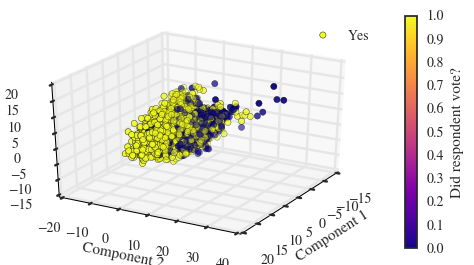

In [108]:
sns.set_style('white')
plt.rcParams["font.family"] = "STIXGeneral"

X_pca = df.drop(['Unnamed: 0','state','congressional_district','VCF0702'], axis = 1)
y_pca = df.VCF0702

X_pca = imp.fit_transform(X_pca)
X_pca = StandardScaler().fit_transform(X_pca)

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_pca)

%matplotlib inline
ax = plt.figure(figsize = (6,3)).add_subplot(1, 1, 1, projection = '3d')
g = ax.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2], c = y_pca, cmap = 'plasma')
ax.set(xlabel = 'Component 1', ylabel = 'Component 2',
      zlabel = 'Component 3')
ax.legend(['Yes','No'])
cbar = plt.colorbar(g, ax = ax)
cbar.set_label('Did respondent vote?')
ax.view_init(elev=30, azim=30)

print('Proportion of total variance explained by {} principal components'.format(pca.n_components_),
      pca.explained_variance_ratio_.sum())

plt.show()

The 3-dimensional plot above does not reveal any obvious separation between voters and non-voters, but there appear to be regions where voters are much more abundant as well as regions where voters and non-voters overlap, but with a greater concentration of non-voters. It is important to note that projecting the entire feature space onto a 3-dimensional subspace only preserves 14.0% of the total variance of the data, so it is possible that better separation exists in higher dimensions where more variance is preserved.

### T-Distributed Stochastic Neighbor Embedding (t-SNE)
An obvious drawback of using PCA to visualize high-dimensional data is the information lost in projecting a large number of features onto two or three dimensions. [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) overcomes these limitations, but at the cost of being much more mathematically complex and thus computationally expensive. Roughly speaking, the procedure is a non-linear transformation that attempts to group similar data points together into clusters while preventing overly dissimilar  data points from being represented by an impractical distance in the resulting visualization.

In the interest of performance, the data is first compressed to 100 features using PCA, resulting in the preservation of 66.8% of total variation before applying the t-SNE algorithm.

In [132]:
X_tsne = df.drop(['Unnamed: 0','state','congressional_district','VCF0702'], axis = 1)
y_tsne = df.VCF0702

X_tsne = imp.fit_transform(X_tsne)
X_tsne = StandardScaler().fit_transform(X_tsne)

pca = PCA(n_components = 100)
X_tsne = pca.fit_transform(X_tsne)

tsne = TSNE(n_components = 3, perplexity = 30, early_exaggeration = 4, learning_rate = 1000, n_iter = 1000)
X_tsne = tsne.fit_transform(X_tsne)

print('Proportion of total variance explained by {} principal components'.format(pca.n_components_),
      pca.explained_variance_ratio_.sum())

Proportion of total variance explained by 100 principal components 0.668027176063


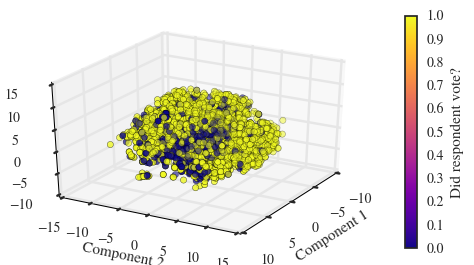

In [135]:
sns.set_style('white')
plt.rcParams["font.family"] = "STIXGeneral"

%matplotlib inline
ax = plt.figure(figsize = (6,3)).add_subplot(111, projection = '3d')
g = ax.scatter(X_tsne[:,0], X_tsne[:,1],X_tsne[:,2], c = y_tsne, cmap = 'plasma')
ax.set(xlabel = 'Component 1', ylabel = 'Component 2',
      zlabel = 'Component 3')
ax.view_init(elev=30, azim=30)
cbar = plt.colorbar(g, ax = ax)
cbar.set_label('Did respondent vote?')

The t-SNE plot above tells a similar story to that of PCA; no obvious separation can be discerned, but the distribution of voters and non-voters in three-dimensional space isn't completely random and uniform either. As with PCA, different regions can have noticeably different compositions.

Next, we take a deeper dive into the data and see which features might relate closely to voting propensity.

# A quick survey of binary features
A straightforward way of uncovering which binary features might be most helpful in classifying voters from non-voters is simply to examine the difference in proportion of non-voters between the two possible categories of each binary feature and assessing the statistical significance with a [two-proportion z-test](http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP).

In [168]:
def binary_vs_target(firstFeatureName, lastFeatureName, targetName, featureKey, df):
    firstIndex = df.columns.get_loc(firstFeatureName)
    lastIndex = df.columns.get_loc(lastFeatureName)
    targetIndex = df.columns.get_loc(targetName)
    
    num_plots = lastIndex - firstIndex + 1
    fig, axes = plt.subplots(num_plots // 4 + 1, 4, figsize = (10, .7 * num_plots))
    
    p_list = []

    for axesIndex, index in zip(range(0, num_plots), range(firstIndex, lastIndex + 1)):
        
        a = df.iloc[:,index]
        b = df.iloc[:,targetIndex]
        
        n1 = sum(a == 0)
        n2 = sum(a == 1)
        x1 = sum((a == 0) & (b == 0))
        x2 = sum((a == 1) & (b == 0))
        p1 = x1 / n1
        p2 = x2 / n2
        g = sns.barplot([0,1],[p1,p2], ax = axes[axesIndex // 4][axesIndex % 4])
        if axesIndex % 4 == 0:
            g.set_ylabel('Proportion NV\nper response')
        
        z = np.abs((p1 - p2) / np.sqrt(p1 * (1-p1) / n1 + p2 * (1-p2) / n2))
        p_value = 2 * (1 - norm.cdf(z))
        feature_name = wrap_text(featureKey[df.columns[index]])
        title = feature_name + '\n' + '('+ df.columns[index] + ')'
        g.set_title(title)
        g.set_xticklabels(['No','Yes'])
        
        correlation = abs(np.corrcoef(a.fillna(a.mean()),b.fillna(b.mean()))[0][1])
        mutual_info = normalized_mutual_info_score(df.iloc[:,index],df.iloc[:,targetIndex])
        
        p_list.append([df.columns[index], featureKey[df.columns[index]], abs(p1-p2), p_value, correlation,
                       mutual_info])
    fig.tight_layout()
    return p_list

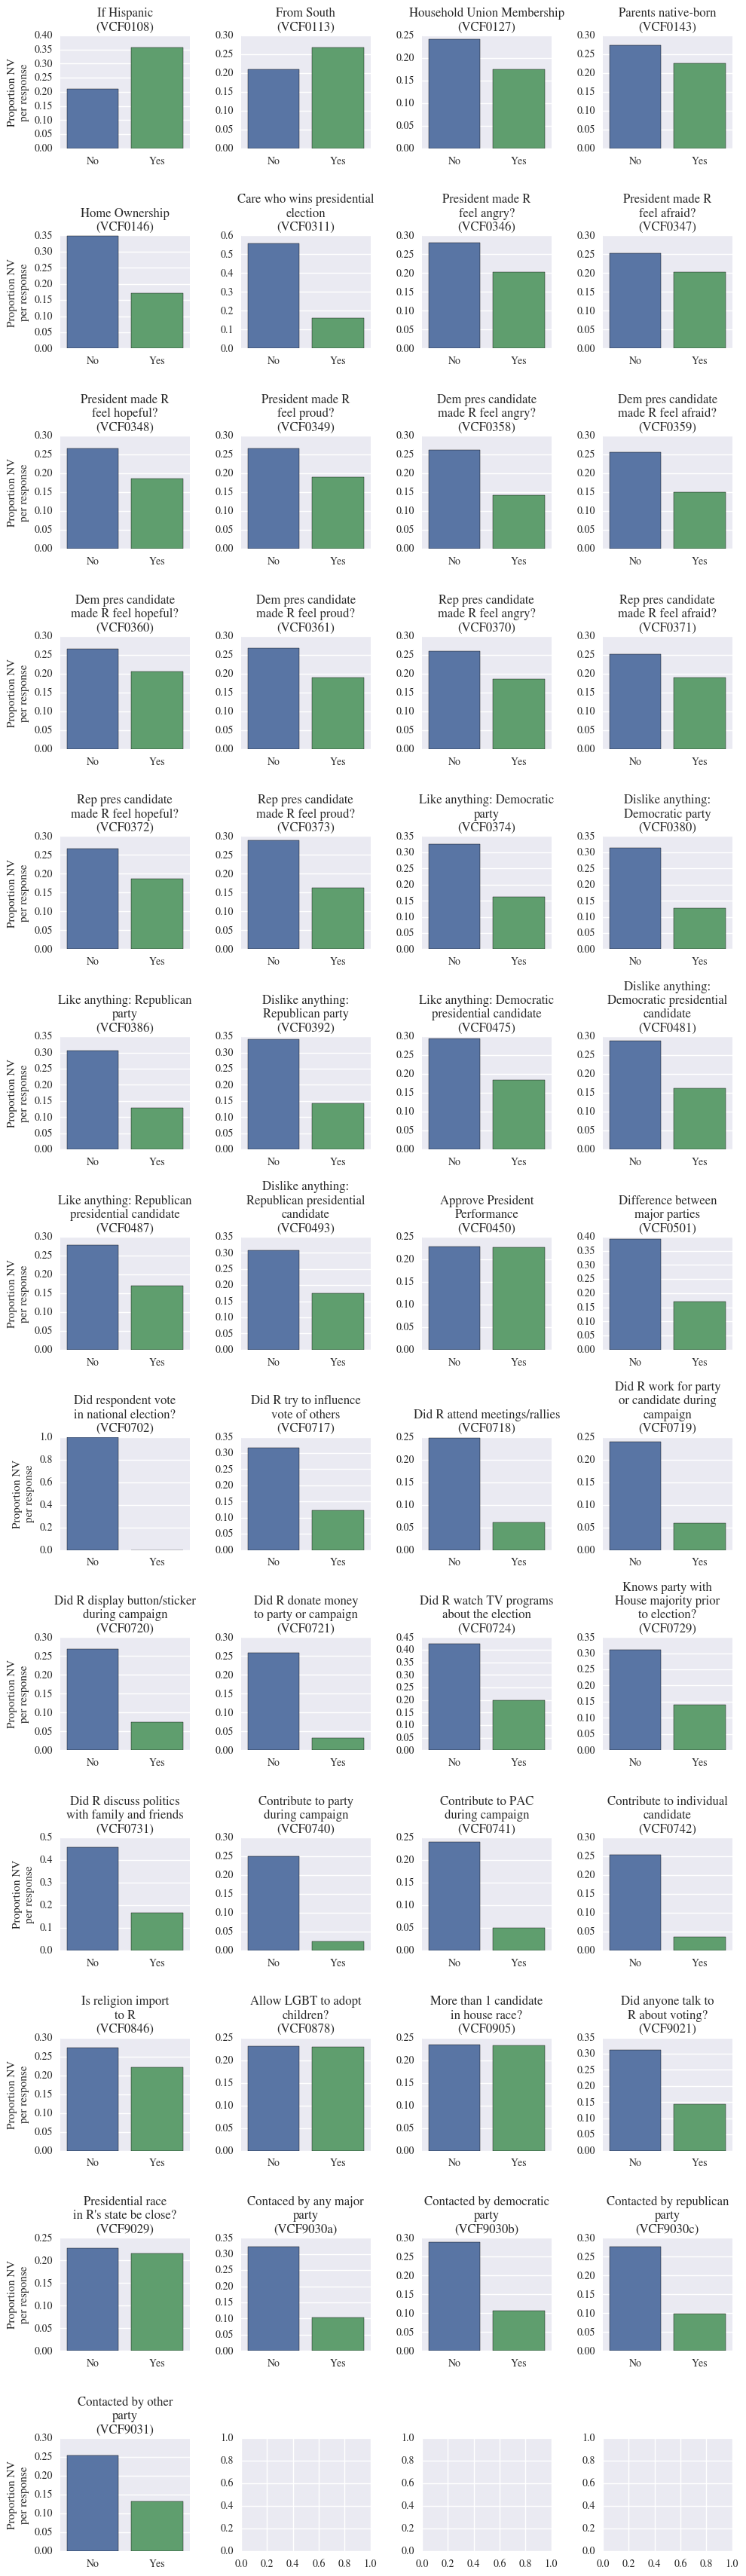

In [169]:
sns.set_style('darkgrid')
plt.rcParams["font.family"] = "STIXGeneral"
p_list = binary_vs_target('VCF0108', 'VCF9031', 'VCF0702', feature_key, df)

To make sense of all the data above, we rank each binary feature by the absolute value of the difference between proportions of non-voters in each category. A difference of proportions is used instead of the p-value simply because so many p-values were zeros.

In [193]:
p_df = pd.DataFrame(p_list)
p_df.columns = ['feature','description','difference_proportions','p-value','correlation','mutual_info']
p_df = p_df.sort_values(by = 'correlation', ascending = True).iloc[0:,:]
p_df.head(10)

feature                               description  difference_proportions  \
26  VCF0450             Approve President Performance                0.000612   
41  VCF0878             Allow LGBT to adopt children?                0.001645   
42  VCF0905      More than 1 candidate in house race?                0.003116   
44  VCF9029  Presidential race in R's state be close?                0.011754   
3   VCF0143                       Parents native-born                0.047312   
40  VCF0846                   Is religion import to R                0.052466   
2   VCF0127                Household Union Membership                0.067455   
7   VCF0347             President made R feel afraid?                0.050596   
1   VCF0113                                From South                0.057289   
12  VCF0360   Dem pres candidate made R feel hopeful?                0.059564   

     p-value  correlation  mutual_info  
26  0.965105     0.000696     0.031623  
41  0.905366     0.001901     0.035522  
42  0.879684     0.002436     0.010661  
44  0.437659     0.012238     0.111591  
3   0.021208     0.038676     0.005479  
40  0.001710     0.052240     0.007064  
2   0.000201     0.054508     0.003396  
7   0.000180     0.059212     0.010478  
1   0.000049     0.066156     0.003597  
12  0.000018     0.069300     0.017226

In [194]:
p_df = pd.DataFrame(p_list)
p_df.columns = ['feature','description','difference_proportions','p-value','correlation','mutual_info']
p_df = p_df.sort_values(by = 'correlation', ascending = False).iloc[1:,:]
p_df.head(49)

feature                                        description  \
5    VCF0311                Care who wins presidential election   
45  VCF9030a                        Contaced by any major party   
36   VCF0731     Did R discuss politics with family and friends   
21   VCF0392                 Dislike anything: Republican party   
29   VCF0717              Did R try to influence vote of others   
27   VCF0501                   Difference between major parties   
19   VCF0380                 Dislike anything: Democratic party   
20   VCF0386                    Like anything: Republican party   
35   VCF0729  Knows party with House majority prior to elect...   
4    VCF0146                                     Home Ownership   
46  VCF9030b                      Contacted by democratic party   
18   VCF0374                    Like anything: Democratic party   
47  VCF9030c                      Contacted by republican party   
32   VCF0720       Did R display button/sticker during campaign   
33   VCF0721            Did R donate money to party or campaign   
43   VCF9021                 Did anyone talk to R about voting?   
34   VCF0724         Did R watch TV programs about the election   
25   VCF0493  Dislike anything: Republican presidential cand...   
39   VCF0742                 Contribute to individual candidate   
17   VCF0373              Rep pres candidate made R feel proud?   
23   VCF0481  Dislike anything: Democratic presidential cand...   
37   VCF0740                Contribute to party during campaign   
22   VCF0475   Like anything: Democratic presidential candidate   
24   VCF0487   Like anything: Republican presidential candidate   
0    VCF0108                                        If Hispanic   
10   VCF0358              Dem pres candidate made R feel angry?   
30   VCF0718                      Did R attend meetings/rallies   
11   VCF0359             Dem pres candidate made R feel afraid?   
48   VCF9031                           Contacted by other party   
8    VCF0348                     President made R feel hopeful?   
16   VCF0372            Rep pres candidate made R feel hopeful?   
13   VCF0361              Dem pres candidate made R feel proud?   
9    VCF0349                       President made R feel proud?   
38   VCF0741                  Contribute to PAC during campaign   
6    VCF0346                       President made R feel angry?   
14   VCF0370              Rep pres candidate made R feel angry?   
31   VCF0719  Did R work for party or candidate during campaign   
15   VCF0371             Rep pres candidate made R feel afraid?   
12   VCF0360            Dem pres candidate made R feel hopeful?   
1    VCF0113                                         From South   
7    VCF0347                      President made R feel afraid?   
2    VCF0127                         Household Union Membership   
40   VCF0846                            Is religion import to R   
3    VCF0143                                Parents native-born   
44   VCF9029           Presidential race in R's state be close?   
42   VCF0905               More than 1 candidate in house race?   
41   VCF0878                      Allow LGBT to adopt children?   
26   VCF0450                      Approve President Performance   

    difference_proportions       p-value  correlation  mutual_info  
5                 0.399264  0.000000e+00     0.362617     0.114240  
45                0.220867  0.000000e+00     0.255805     0.062556  
36                0.290371  0.000000e+00     0.242067     0.141072  
21                0.199910  0.000000e+00     0.231964     0.062039  
29                0.193851  0.000000e+00     0.227229     0.044857  
27                0.219666  0.000000e+00     0.217943     0.075153  
19                0.186011  0.000000e+00     0.216516     0.060664  
20                0.176908  0.000000e+00     0.204859     0.056846  
35                0.170431  0.000000e+00     0.200864     0.035583  
4                 0.176171  0.0

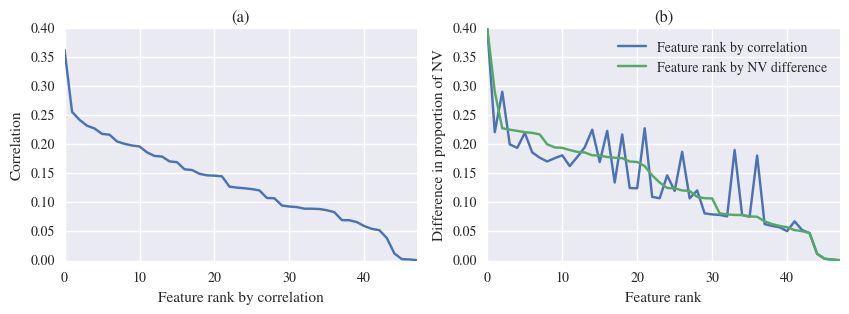

In [196]:
sns.set_style('darkgrid')
plt.rcParams["font.family"] = "STIXGeneral"

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

g = p_df.loc[:,'correlation'].reset_index(drop = True).plot(kind = 'line', ax = axes[0])
g.set(ylabel = 'Correlation', xlabel = 'Feature rank by correlation', title = '(a)')

g = p_df.loc[:,'difference_proportions'].reset_index(drop = True).plot(kind = 'line', ax = axes[1])

g = p_df.loc[:,'difference_proportions'].sort_values(ascending = False).reset_index(drop = True).plot(
    kind = 'line', ax = axes[1])
g.set(ylabel = 'Difference in proportion of NV', xlabel = 'Feature rank', title = '(b)')
g.legend(['Feature rank by correlation','Feature rank by NV difference'])

Here we see that VCF0311, VCF0731, VCF0724, and VCF0392 reappear as important features as measured by mutual information with the target, so we may be reasonably confident that these will be among the more useful features for classification (provided they are not highly correlated with each other).

# A quick survey of continuous and quasi-continuous features
### Age and voting propensity
Conventional wisdom says that young voters are also low-propensity voters. Let's see if this is born out in the data.

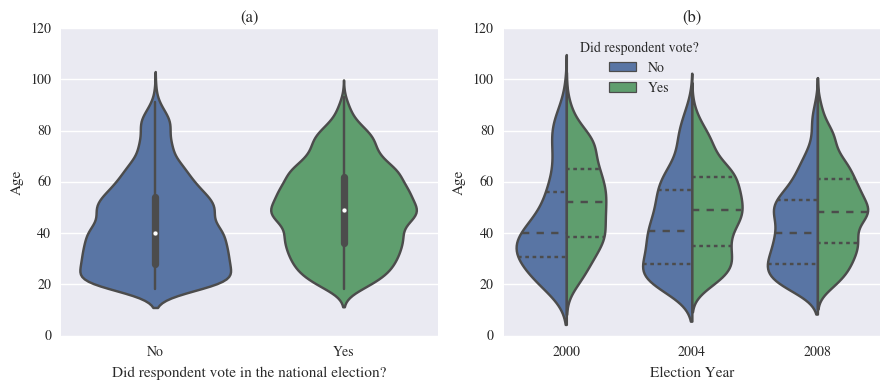

In [216]:
fig, axes = plt.subplots(1, 2, figsize = (9, 4))
df_temp = df[df.age > 10]
g = sns.violinplot(x = df_temp.VCF0702, y = df_temp.age, bw = .2, ax = axes[0])
g.set(title = '(a)', xticklabels = ['No','Yes'])
g.set(xlabel = 'Did respondent vote in the national election?', ylabel = 'Age')
g = sns.violinplot(x = df_temp.year, y = df_temp.age, hue = df_temp.VCF0702, ax = axes[1], split = True,
                  inner = 'quartile')
g.set(title = '(b)')
g.set(xlabel = 'Election Year', ylabel = 'Age', ylim = (0, 120))
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ['No','Yes'], title = 'Did respondent vote?', bbox_to_anchor=(0.55, 1))
plt.tight_layout()

In fact, this very much appears to be the case, with the median voter being approximately 10 years older than the median non-voter. The characterization that non-voters skew much younger also appears to hold across different election years.

### Thermometer and index features
The vast majority of quasi-continuous data comes from a set of features associated with **"Thermometer"** type questions. In a thermometer question, the respondent is asked to rate an individual, group, or institution with a value, with lower values indicating a less favorable sentiment and higher values indicating a more favorable sentiment. Let's first examine how these thermometer features are correlated with each other.

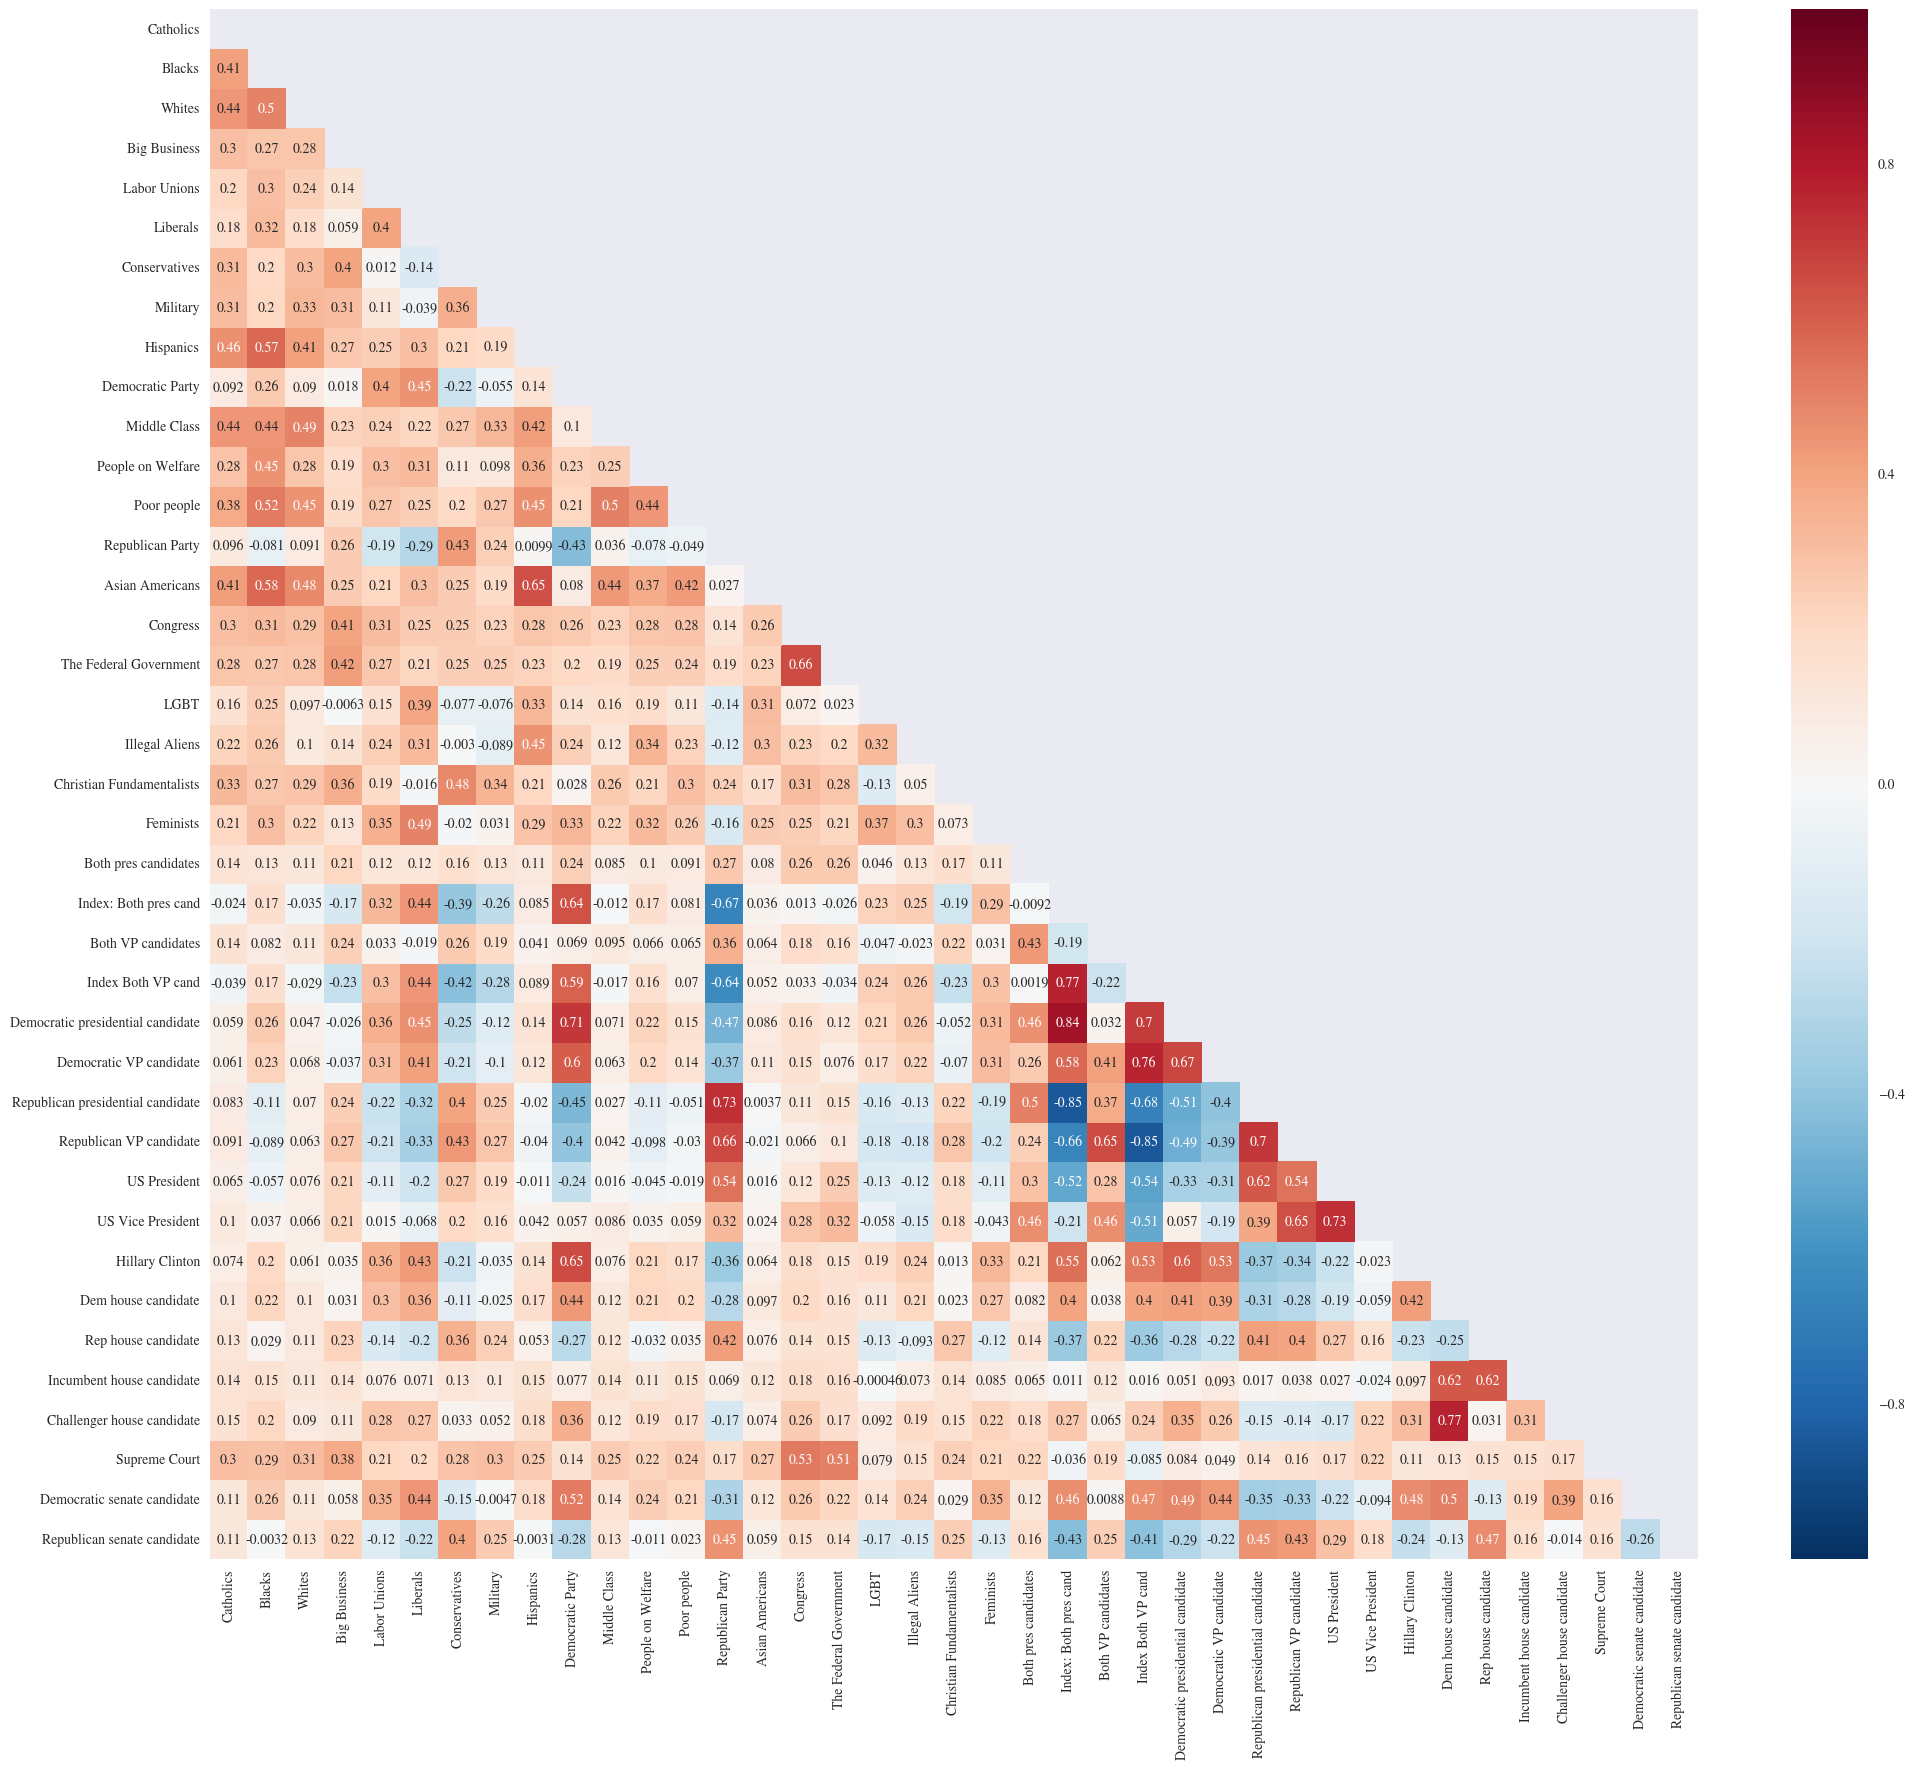

In [28]:
firstIndex = df.columns.get_loc('VCF0204')
lastIndex = df.columns.get_loc('VCF9057')

numerical_df = df.iloc[:,range(firstIndex,lastIndex+1,2)]
numerical_df = pd.concat([numerical_df, df.iloc[:,df.columns.get_loc('VCF0649'):df.columns.get_loc('VCF1016')]],
                         axis = 1)

numerical_df = numerical_df.drop(['VCF0801_dk'], axis = 1)
numerical_df = numerical_df.drop(['VCF0649','VCF0656','VCF0723','VCF0733','VCF0801'], axis = 1)
numerical_df = numerical_df.drop(['VCF1015','VCF0138','VCF0291'], axis = 1)

columns = []
for column in numerical_df.columns:
    new_name = feature_key[column]
    new_name = new_name.replace('Thermometer: ','')      
    columns.append(new_name)
numerical_df.columns = columns
                        
fig, axes = plt.subplots(1,1,figsize = (24,20))
corr = numerical_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, ax = axes, mask = mask, annot = True)

In [29]:
x = np.array(corr).reshape(-1)
x = sorted(x, key = lambda x: abs(x))
x = x[::-2]
#x[20:]

With a few exceptions, the thermometer features do not appear to be significantly correlated with each other. This is encouraging, as [multicollinearity](https://onlinecourses.science.psu.edu/stat501/node/344) can cause a whole host of [problems](https://onlinecourses.science.psu.edu/stat501/node/346) when trying to extract insight from a linear model like logistic regression. If it does so happen that a linear model is needed, then it will be necessary to break the correlation chains present in these thermometer features.

How exactly are these thermometer features distrbuted?

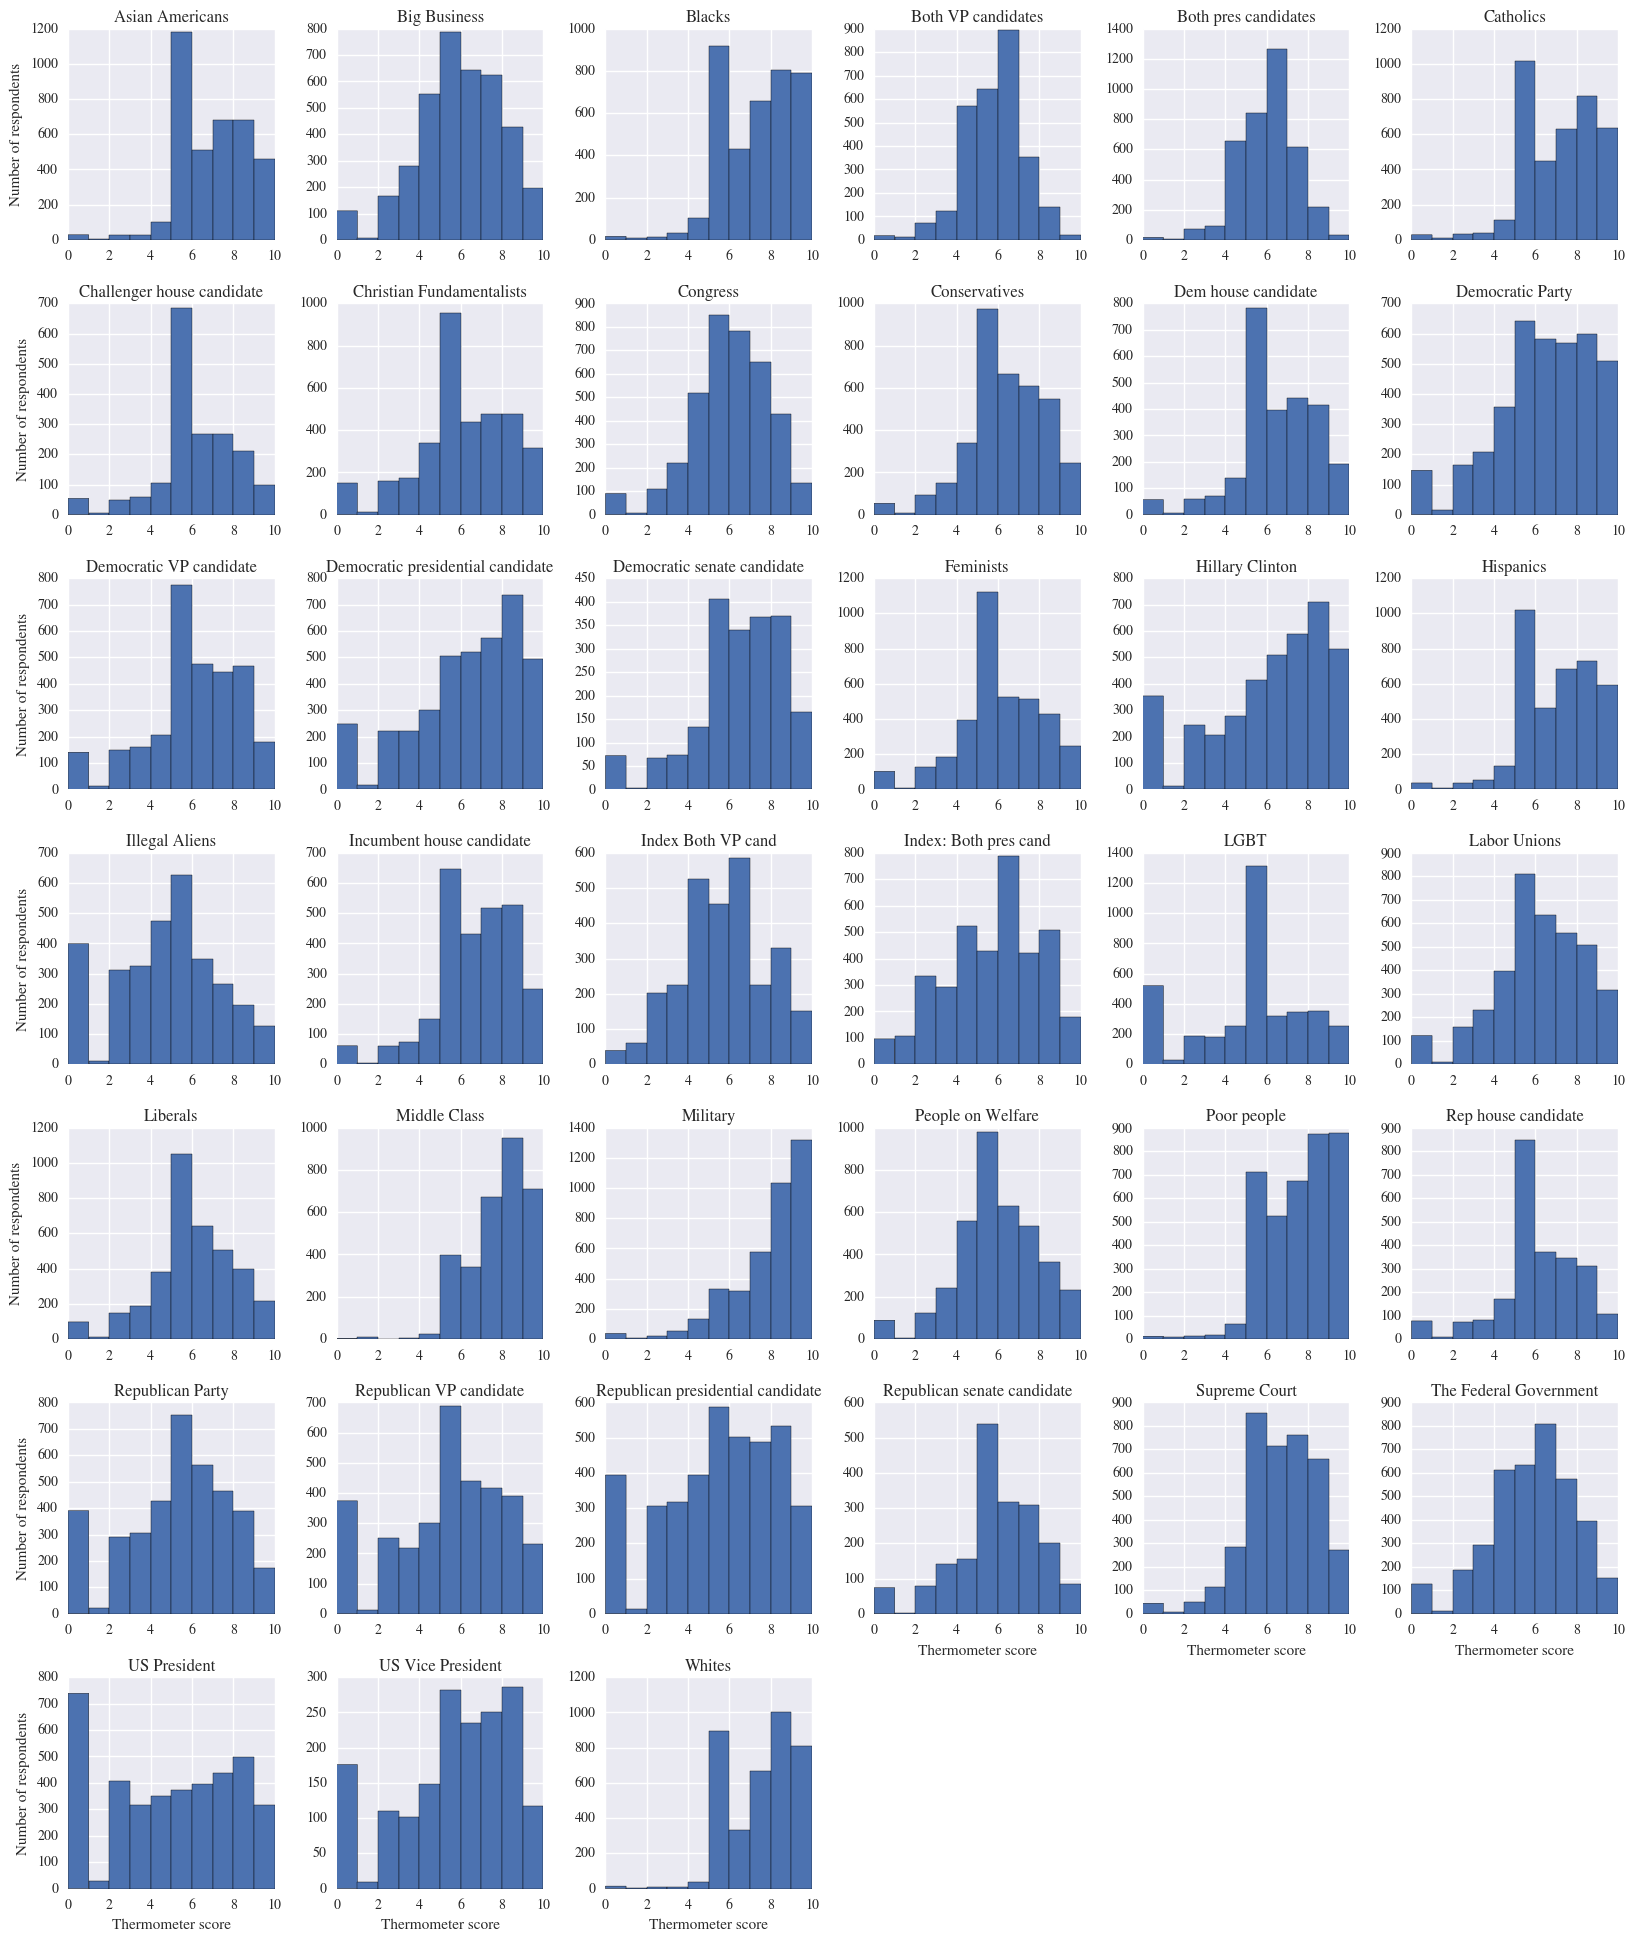

In [146]:
axes = numerical_df.iloc[:,:].hist(figsize = (20,24))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        if j == 0:
            ax.set_ylabel("Number of respondents")
        if (j + 1) + 6 * (i) > 33:
            ax.set_xlabel("Thermometer score")

While the thermometer scores for these features can be distributed in any number of ways, it is often the case that a score of 50, indicating a neutral sentiment, is the most prevalent. Let's see what proportion of non-voters comprise each thermometer score bucket.

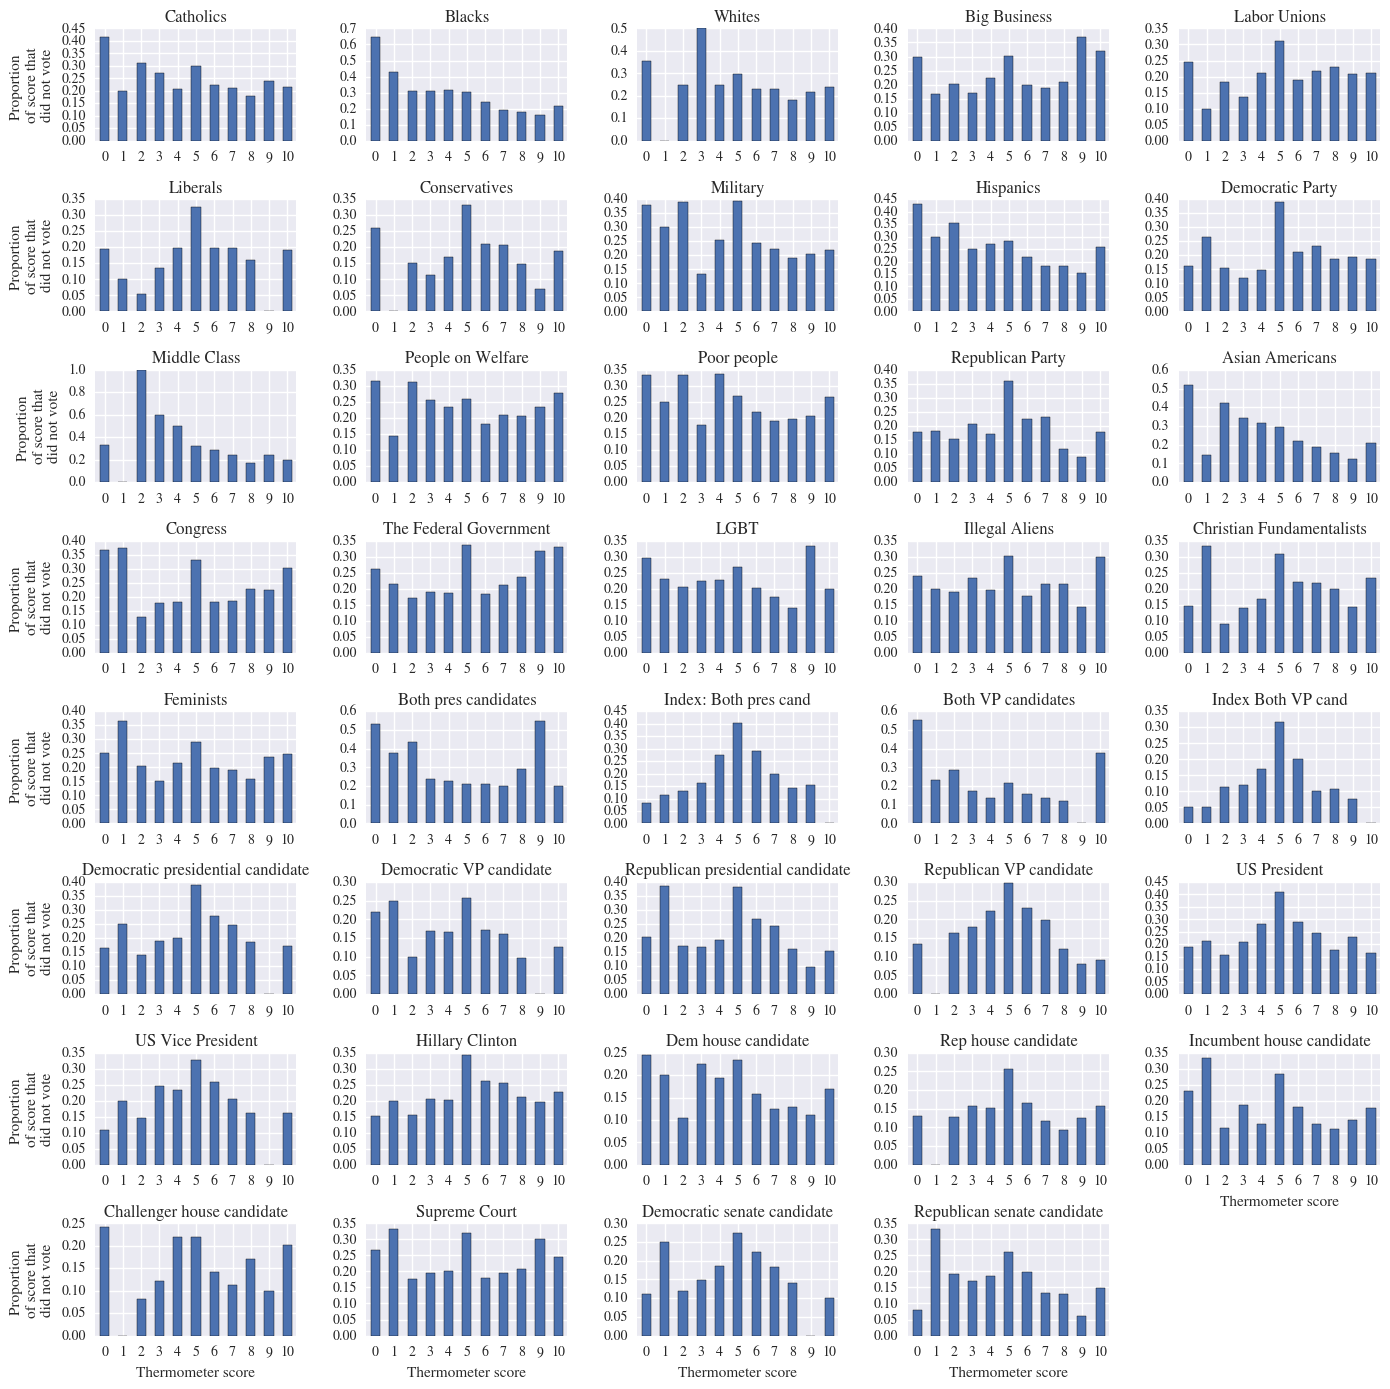

In [31]:
n = numerical_df.shape[1]
m = 5

for index in range(0, numerical_df.shape[1]):
    feature = numerical_df.iloc[:,index]
    feature = pd.concat([feature, np.logical_not(df.VCF0702)], axis = 1)
    feature = feature.groupby([numerical_df.columns[index],'VCF0702']).size().unstack('VCF0702').fillna(0)
    feature = feature[1] / (feature[0] + feature[1])
    feature = feature.reset_index(drop = True)
    g = pd.DataFrame(feature).plot(kind = 'bar', ax = plt.subplot2grid((math.ceil(n/m),m),(index // m, index % m)),
                                  figsize = (14, 14))
    g.set(title = numerical_df.columns[index], xlabel = " ")
    for tick in g.get_xticklabels():
        tick.set_rotation(0)
    g.legend([])
    
    if index % m == 0:
        g.set_ylabel('Proportion\nof score that\ndid not vote')
    if index >= 34:
        g.set_xlabel('Thermometer score')
    
plt.tight_layout()

It appears that with partisan subjects, such as prominent political figures, ideologies, and parties, a more neutral score indicates a greater likelihood of not voting.

Let's transform all thermometer features into sentiment intensity features by measuring the distance of a thermometer score from 50, dividing by 10, and rounding to the nearest number, resulting in values ranging from **0 to 5**.

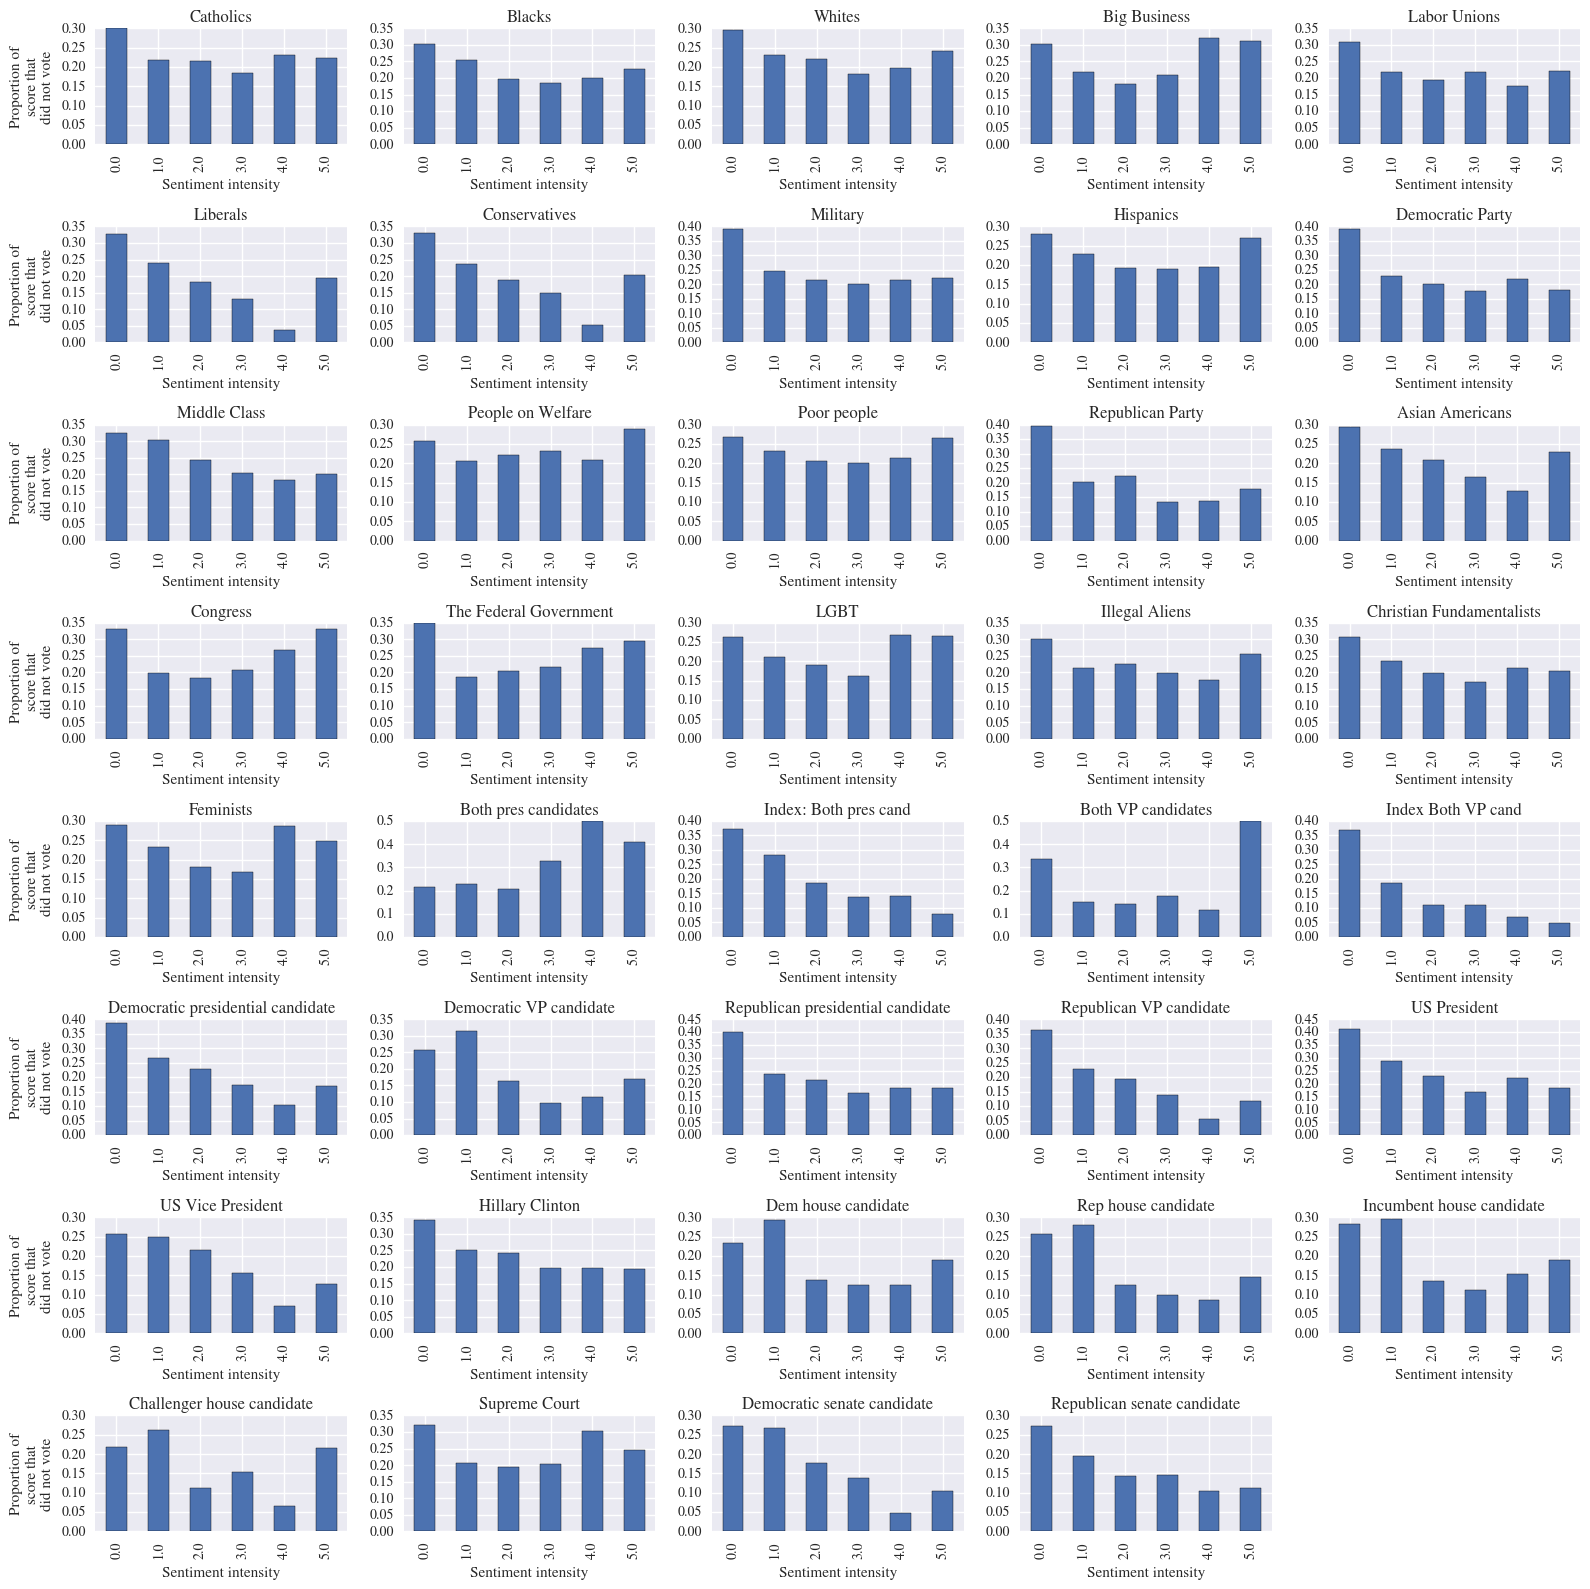

In [32]:
n = numerical_df.shape[1]
#fig, axes = plt.subplots(n // 5 + 1, 5, figsize = (20, 0.6 * n))
m = 5

for index in range(0, numerical_df.shape[1]):
    feature = numerical_df.iloc[:,index]
    feature = round(feature.fillna(feature.mean()))
    feature = abs(feature - 5)
    feature = pd.concat([feature, np.logical_not(df.VCF0702)], axis = 1)
    feature_name = feature.columns[0]
    
    nv = feature.groupby(feature_name).agg(sum)
    total = feature.groupby(feature_name).size()

    nv_prop = pd.DataFrame(nv.VCF0702 / total)
    g = nv_prop.plot(kind = 'bar', ax = plt.subplot2grid((math.ceil(n/m),m), (index // m, index % m)),
                    figsize = (16,16))
    g.set_xlabel('Sentiment intensity')
    g.set_title(feature_name)
    g.legend([])
    
    if index % m == 0:
        g.set_ylabel('Proportion of\nscore that\ndid not vote')
    
plt.tight_layout()

For many thermometer features, it appears to be true that lower sentiment intensity correlates to a greater likelihood of not voting. Whether the trend in some of these features is strong enough to be useful in a classification problem remains an open question, but it may be worthwhile to use the thermometer features to derive a set of intensity features nonetheless in case we decide to use a linear model.

# A quick survey of ordinal features (and binary features derived from them)
Our approach towards exploring ordinal features is much the same as for quasi-continuous features. Some features correspond to questions asking the respondent for their opinion on a subject, with valid responses ranging between "strongly disagree" to "strongly agree." Other features correspond to questions assessing the respondent's political knowledge.

Features with a "_dk" postfix record whether the respondent answered "don't know" to a particular question.

NameError: name 'fig' is not defined

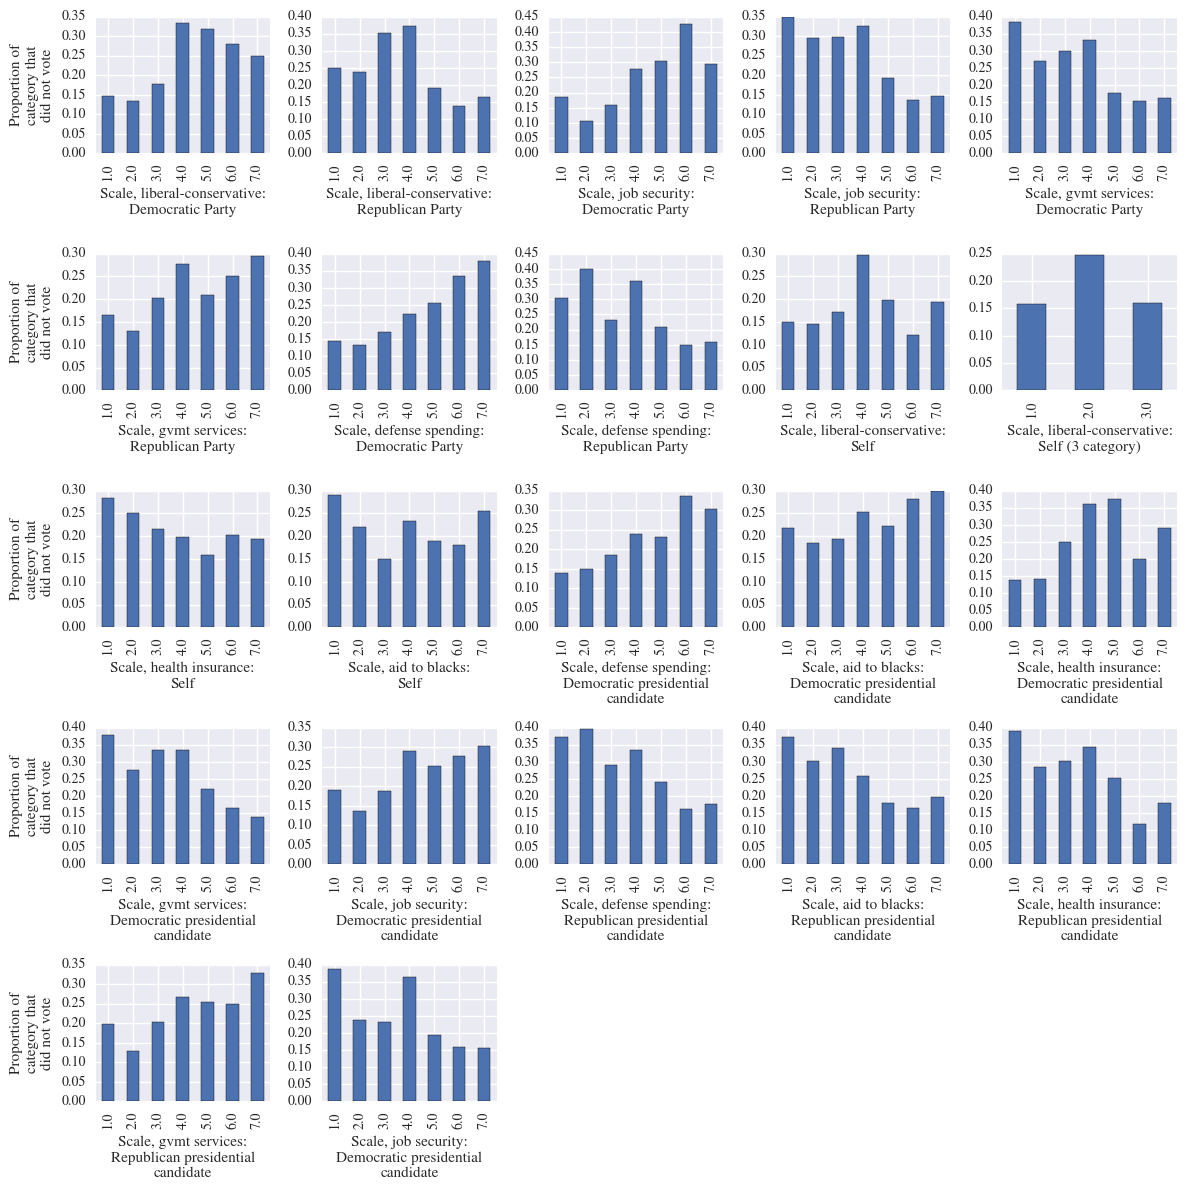

In [25]:
temp_df = df[:]
scale_list = ['VCF0503','VCF0504','VCF0513','VCF0514','VCF0541','VCF0542','VCF0549','VCF0550','VCF0803','VCF0804',
               'VCF0806','VCF0830','VCF9081','VCF9084','VCF9085','VCF9086','VCF9087','VCF9089','VCF9092','VCF9093',
               'VCF9094','VCF9095']
n = len(scale_list)
m = 5
#fig, axes = plt.subplot2grid(n // m + 1, m, figsize = (10, 0.5 * n))
for index, feature in enumerate(scale_list):
    r = temp_df.groupby([feature,'VCF0702']).size()
    r = r.unstack('VCF0702')
    r['non_voter_proportion'] = r.iloc[:,0] / (r.iloc[:,1] + r.iloc[:,0])
    g = r.non_voter_proportion.plot(kind = 'bar', ax = plt.subplot2grid((m, math.ceil(n/m)),(index // m, index % m),
                                                                       colspan = 1, rowspan = 1), figsize = (12,12))
    if index % m == 0:
        g.set_ylabel('Proportion of\ncategory that\ndid not vote')
    if feature in feature_key:
        title = wrap_text(feature_key[feature])
        g.set_xlabel(title)
    
plt.tight_layout()

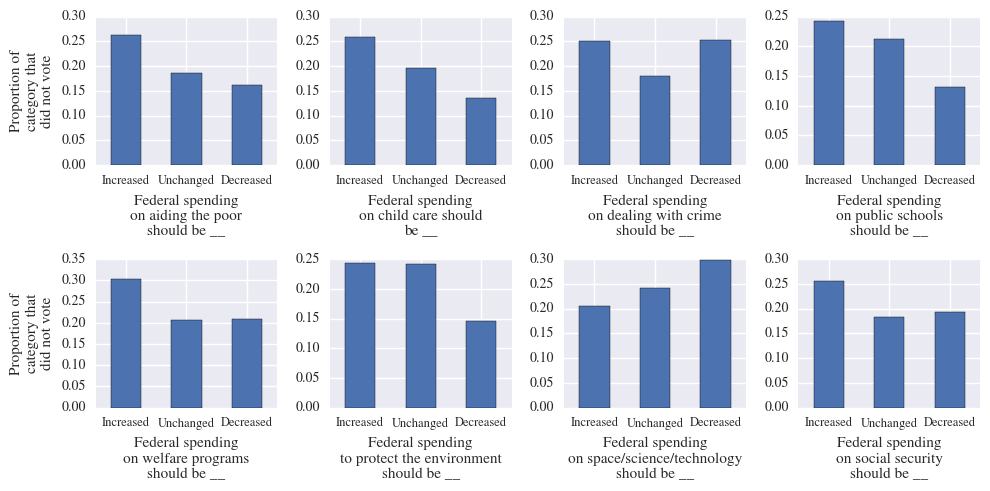

In [24]:
temp_df = df[:]
scale_list = ['VCF0886','VCF0887','VCF0888','VCF0890','VCF0894','VCF9047','VCF9048','VCF9049']
n = len(scale_list)
m = 4
#fig, axes = plt.subplot2grid(n // m + 1, m, figsize = (10, 0.5 * n))
for index, feature in enumerate(scale_list):
    r = temp_df.groupby([feature,'VCF0702']).size()
    r = r.unstack('VCF0702')
    r['non_voter_proportion'] = r.iloc[:,0] / (r.iloc[:,1] + r.iloc[:,0])
    g = r.non_voter_proportion.plot(kind = 'bar', ax = plt.subplot2grid((math.ceil(n/m),m),(index // m, index % m)),
                                    figsize = (10,5))
    plt.xticks([0,1,2],['Increased','Unchanged','Decreased'], rotation = 0, size = 9)
    if index % m == 0:
        g.set_ylabel('Proportion of\ncategory that\ndid not vote')
    if feature in feature_key:
        title = wrap_text(feature_key[feature])
        g.set_xlabel(title)
    
plt.tight_layout()

In [449]:
df_check

Unnamed: 0  VCF0004  VCF0011z  VCF0101    VCF0104  \
0          42908     2000    1.2886     49.0    1. Male   
1          42909     2000    0.8959     35.0  2. Female   
2          42910     2000    1.0454     57.0  2. Female   
3          42911     2000    0.6005     63.0    1. Male   
4          42912     2000    1.9270     40.0  2. Female   
5          42913     2000    2.2261     77.0    1. Male   
6          42914     2000    1.2846     43.0    1. Male   
7          42915     2000    0.5885     47.0  2. Female   
8          42916     2000    1.4413     26.0  2. Female   
9          42917     2000    0.7079     48.0  2. Female   
10         42918     2000    2.0004     41.0  2. Female   
11         42919     2000    2.6184     41.0    1. Male   
12         42921     2000    1.8641     18.0  2. Female   
13         42922     2000    0.5696     70.0  2. Female   
14         42923     2000    1.1358     31.0    1. Male   
15         42924     2000    3.1964     18.0  2. Female   
16         42925     2000    0.6735     22.0  2. Female   
17         42929     2000    2.6296     43.0  2. Female   
18         42930     2000    0.6058     57.0  2. Female   
19         42931     2000    0.8330     43.0    1. Male   
20         42932     2000    0.5605     63.0  2. Female   
21         42935     2000    0.7192     29.0    1. Male   
22         42936     2000    1.3408     63.0    1. Male   
23         42937     2000    2.1575     19.0  2. Female   
24         42938     2000    0.5175     57.0  2. Female   
25         42939     2000    0.7133     78.0  2. Female   
26         42941     2000    0.6278     68.0    1. Male   
27         42944     2000    0.6021     76.0  2. Female   
28         42947     2000    0.5526     59.0  2. Female   
29         42948     2000    0.9322     62.0    1. Male   
...          ...      ...       ...      ...        ...   
9344       55640     2012    0.4995     25.0  2. Female   
9345       55641     2012    1.4923     65.0  2. Female   
9346       55642     2012    0.2893     39.0    1. Male   
9347       55643     2012    1.4051     25.0  2. Female   
9348       55644     2012    4.5794     29.0    1. Male   
9349       55645     2012    0.6447     72.0  2. Female   
9350       55646     2012    0.3670     48.0    1. Male   
9351       55647     2012    1.5625     24.0    1. Male   
9352       55648     2012    0.0386     34.0    1. Male   
9353       55649     2012    2.7385     27.0  2. Female   
9354       55650     2012    0.0297     71.0  2. Female   
9355       55651     2012    2.2565     23.0    1. Male   
9356       55653     2012    0.9766     44.0  2. Female   
9357       55654     2012    0.7691     52.0  2. Female   
9358       55657     2012    1.1352     56.0  2. Female   
9359       55658     2012    1.0596     60.0  2. Female   
9360       55659     2012    1.5677     38.0  2. Female   
9361       55661     2012    1.4769     60.0  2. Female   
9362       55662     2012    1.1169     68.0  2. Female   
9363       55663     2012    0.6848     52.0  2. Female   
9364       55664     2012    1.4435     31.0  2. Female   
9365       55665     2012    0.8355     67.0  2. Female   
9366       55666     2012    0.8457     57.0  2. Female   
9367       55667     2012    1.8327     49.0  2. Female   
9368       55668     2012    0.9186     60.0  2. Female   
9369       55669     2012    0.0612     34.0  2. Female   
9370       55670     2012    1.1720     42.0  2. Female   
9371       55671     2012    0.2643     58.0  2. Female   
9372       55672     2012    0.9108     33.0    1. Male   
9373       55673     2012    1.6151     56.0  2. Female   

                                               VCF0105a  \
0                     1. White non-Hispanic (1948-2012)   
1                     1. White non-Hispanic (1948-2012)   
2                     1. White non-Hispanic (1948-2012)   
3                     1. White non-Hispanic (1948-2012)   
4                     1. White non-Hispanic (1948-20

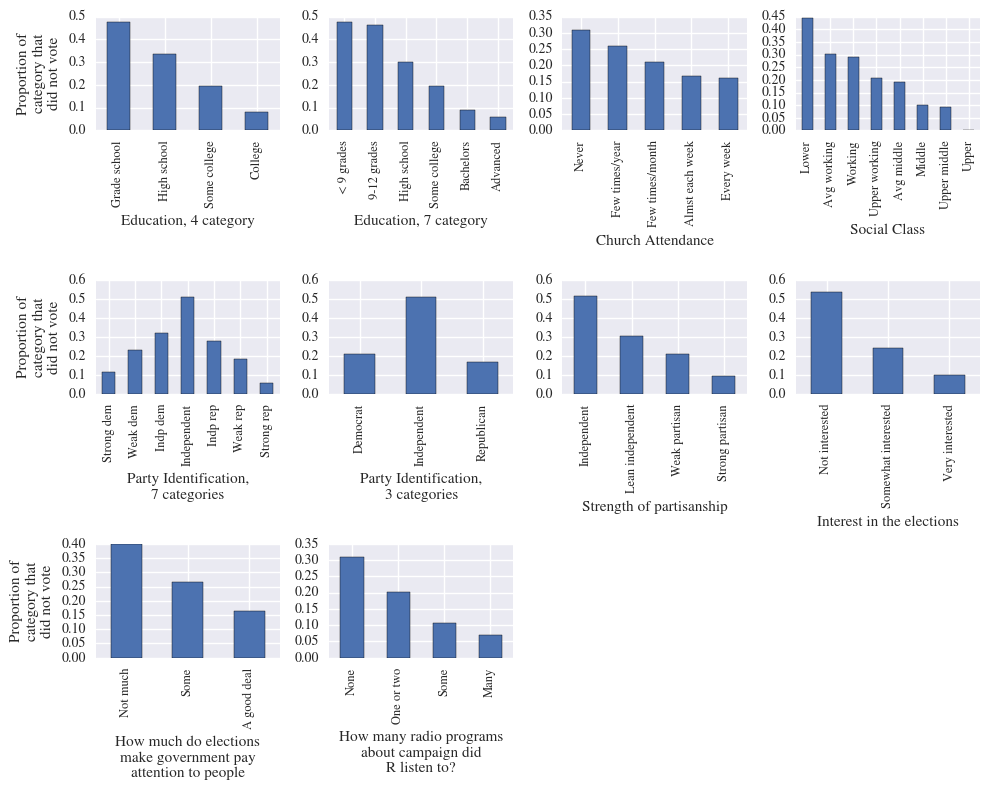

In [22]:
temp_df = df[:]
scale_list = ['VCF0110','VCF0140a','VCF0130','VCF0148','VCF0301',
             'VCF0303','VCF0305','VCF0310','VCF0624','VCF9032']
xticks_orig = [range(0,4),range(0,6),range(0,5),range(0,8),range(0,7),range(0,3),range(0,4),range(0,3),range(0,3),
               range(0,4)]
xticks_new = [['Grade school','High school','Some college','College'],
             ['< 9 grades','9-12 grades','High school','Some college','Bachelors','Advanced'],
             ['Never','Few times/year','Few times/month','Almst each week','Every week'],
             ['Lower','Avg working','Working','Upper working','Avg middle','Middle','Upper middle','Upper'],
             ['Strong dem','Weak dem','Indp dem','Independent','Indp rep','Weak rep','Strong rep'],
             ['Democrat','Independent','Republican'],
             ['Independent','Lean independent','Weak partisan','Strong partisan'],
             ['Not interested','Somewhat interested','Very interested'],
             ['Not much','Some','A good deal'],
             ['None','One or two','Some','Many']]
n = len(scale_list)
m = 4
#fig, axes = plt.subplot2grid(n // m + 1, m, figsize = (10, 0.5 * n))
for index, feature in enumerate(scale_list):
    r = temp_df.groupby([feature,'VCF0702']).size()
    r = r.unstack('VCF0702')
    r['non_voter_proportion'] = r.iloc[:,0] / (r.iloc[:,1] + r.iloc[:,0])
    g = r.non_voter_proportion.plot(kind = 'bar', ax = plt.subplot2grid((math.ceil(n/m),m),(index // m, index % m)),
                                    figsize = (10,8))
    if index % m == 0:
        g.set_ylabel('Proportion of\ncategory that\ndid not vote')
    if feature in feature_key:
        title = wrap_text(feature_key[feature])
        g.set_xlabel(title)
    plt.xticks(xticks_orig[index],xticks_new[index], size = 9, rotation = 90)
    
plt.tight_layout()

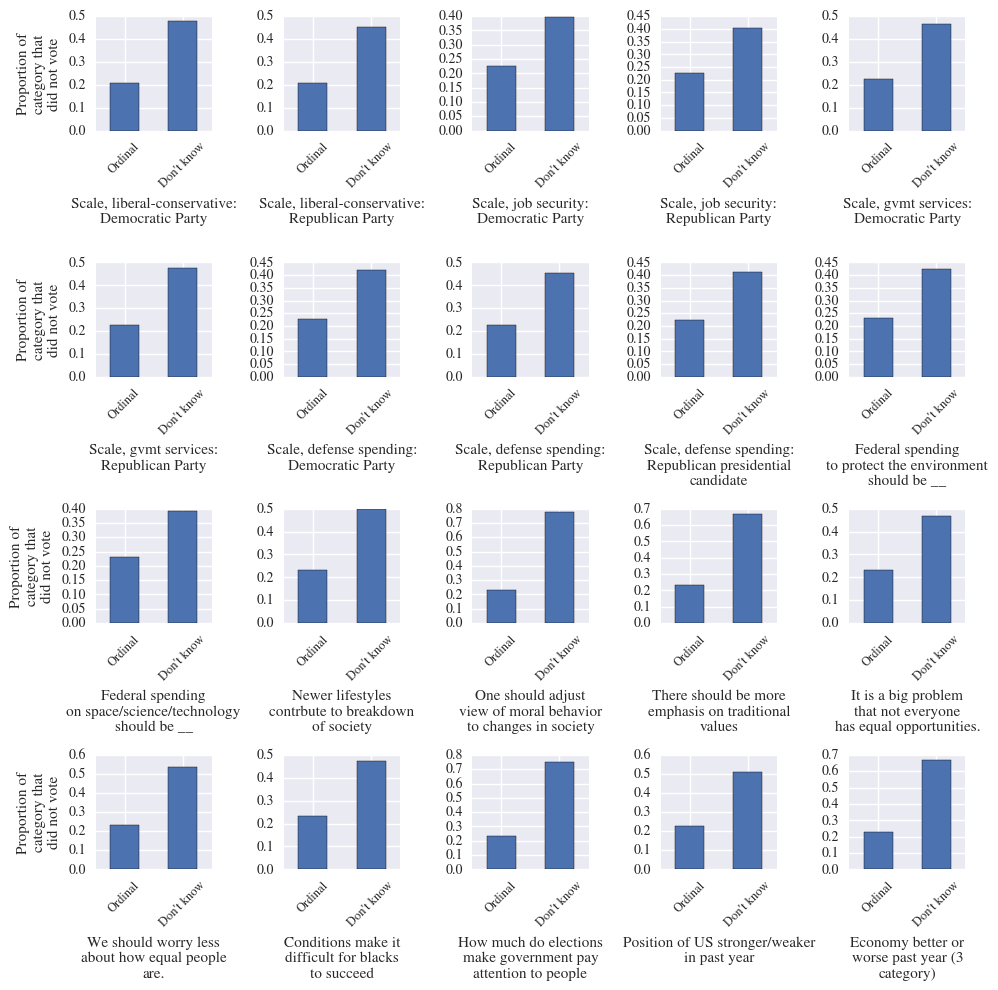

In [21]:
temp_df = df[:]
scale_list = ['VCF0503_dk','VCF0504_dk','VCF0513_dk','VCF0514_dk','VCF0541_dk','VCF0542_dk','VCF0549_dk','VCF0550_dk',
              'VCF9089_dk','VCF9047_dk','VCF9048_dk','VCF0851_dk','VCF0852_dk','VCF0853_dk','VCF9015_dk','VCF9017_dk',
              'VCF9039_dk',
              'VCF0624_dk','VCF9045_dk','VCF0870_dk']
n = len(scale_list)
m = 5
for index, feature in enumerate(scale_list):
    feature_orig = feature[:-3]
    r = temp_df.groupby([feature,'VCF0702']).size()
    r = r.unstack('VCF0702')
    r['non_voter_proportion'] = r.iloc[:,0] / (r.iloc[:,1] + r.iloc[:,0])
    g = r.non_voter_proportion.plot(kind = 'bar', ax = plt.subplot2grid((math.ceil(n/m),m),(index // m, index % m)),
                                    figsize = (10,10))
    if index % m == 0:
        g.set_ylabel('Proportion of\ncategory that\ndid not vote')
    if feature_orig in feature_key:
        title = wrap_text(feature_key[feature_orig])
        g.set_xlabel(title)
    plt.xticks([0,1],['Ordinal','Don\'t know'], size = 9, rotation = 45)
    
plt.tight_layout()

A cursory review of the plots above show three things: 
1.  Certain features are reasonably correlated with likelihood to not vote, like VCF0932, VCF0310, VCF0148, and VCF0140a among others. However, as with binary features, the predictive power of ordinal features also depends on how respondents are distributed within each feature category. So while some features show promise, their usefulness for classification remain unknown for now.

2. As with the thermometer features, some ordinal features may also benefit from a transformation that measures the distance from the center of the distribution, like VCF9009 and VCF0851, for example.

3. In general, a respondent that answers 'don't know' to a question is more likely, sometimes significantly so, to be a non-voter.

Given the third observation, it might be reasonable to expect that the more a respondent answers "don't know", the more likely he/she is to be a non-voter. We can check if the data supports this notion with the following plots.

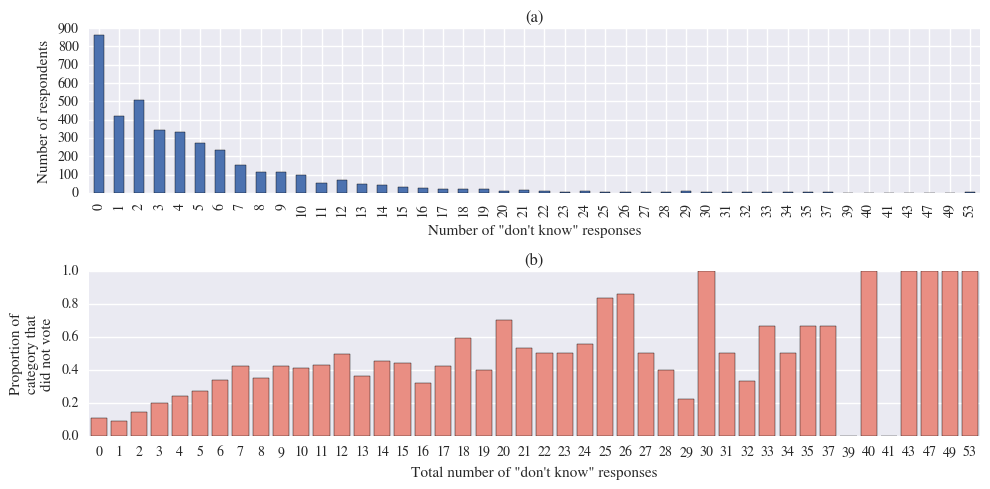

In [46]:
fig, axes = plt.subplots(2,1,figsize = (10,5))

dksum_df = df.loc[:,df.columns.str.contains('dk')].astype(int)
dksum_df['total'] = dksum_df.iloc[:,1:].sum(axis = 1)
g = dksum_df.total.value_counts().sort_index().plot(kind = 'bar', ax = axes[0])
g.set_title('(a)')
g.set_xlabel('Number of \"don\'t know\" responses')
g.set_ylabel('Number of respondents')

dksum_df = pd.concat([dksum_df, df.VCF0702], axis = 1)
dksum_df = dksum_df.groupby(['total','VCF0702']).size()
dksum_df = dksum_df.unstack('VCF0702')
dksum_df = dksum_df.fillna(0)
dksum_df['nonvote_proportion'] = dksum_df.iloc[:,0] / (dksum_df.iloc[:,0] + dksum_df.iloc[:,1])

g = sns.barplot(x = dksum_df.index, y = dksum_df.nonvote_proportion, color = 'salmon', ax = axes[1])
g.set(title = '(b)', xlabel = 'Total number of \"don\'t know\" responses',
      ylabel = 'Proportion of\ncategory that\ndid not vote')
plt.tight_layout()

It appears that a respondent's likelihood to stay at home on election day increases with each "don't know" response up to 9 such responses. Beyond that the data becomes too sparse to make meaningful conclusions.

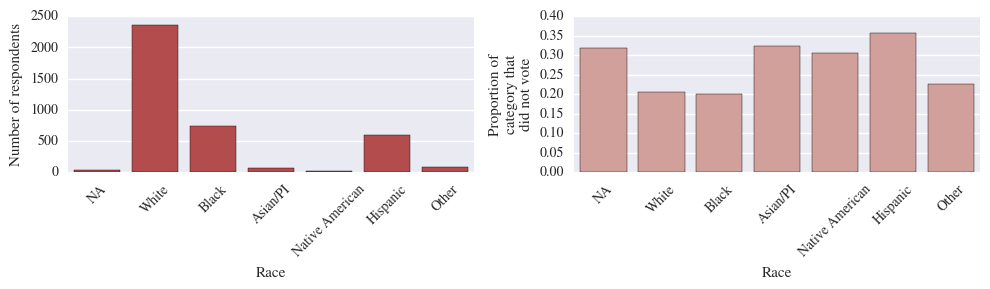

In [48]:
respondent_counts = []
NV_proportion = []
x = ['NA','White','Black','Asian/PI','Native American','Hispanic','Other']

first_index = df.columns.get_loc('VCF0105a_oh0')
last_index = df.columns.get_loc('VCF0105a_oh6')
for index in range(first_index, last_index + 1):
    respondent_counts.append(sum(df.iloc[:,index] == 1))
    NV_proportion.append(sum((df.iloc[:,index] == 1) & (df.VCF0702 == 0)) / respondent_counts[-1])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
g1 = sns.barplot(x = x, y = respondent_counts, color = 'red',
            saturation = 0.4, ax = axes[0])
g1.set_ylabel('Number of respondents'); g1.set_xlabel('Race')
for each in g1.get_xticklabels():
    each.set_rotation(45)

g2 = sns.barplot(x = x, y = NV_proportion, color = 'salmon',
            saturation = 0.4, ax = axes[1])
g2.set_ylabel('Proportion of\ncategory that\ndid not vote'); g2.set_xlabel('Race')
plt.xticks(rotation = 45)
plt.tight_layout()

In [61]:
sum(df.VCF0702 == 0)

903

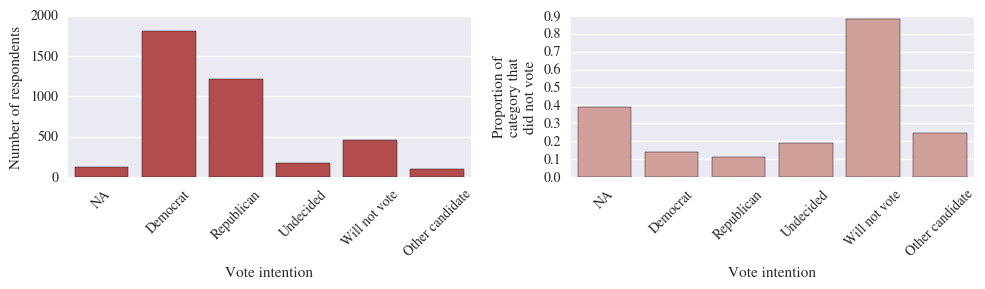

In [59]:
respondent_counts = []
NV_proportion = []
x = ['NA','Democrat','Republican','Undecided','Will not vote','Other candidate']

first_index = df.columns.get_loc('VCF0713_oh0')
last_index = df.columns.get_loc('VCF0713_oh5')
for index in range(first_index, last_index + 1):
    respondent_counts.append(sum(df.iloc[:,index] == 1))
    NV_proportion.append(sum((df.iloc[:,index] == 1) & (df.VCF0702 == 0)) / respondent_counts[-1])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
g1 = sns.barplot(x = x, y = respondent_counts, color = 'red',
            saturation = 0.4, ax = axes[0])
g1.set_ylabel('Number of respondents'); g1.set_xlabel('Vote intention')
for each in g1.get_xticklabels():
    each.set_rotation(45)

g2 = sns.barplot(x = x, y = NV_proportion, color = 'salmon',
            saturation = 0.4, ax = axes[1])
g2.set_ylabel('Proportion of\ncategory that\ndid not vote'); g2.set_xlabel('Vote intention')
plt.xticks(rotation = 45)
plt.tight_layout()

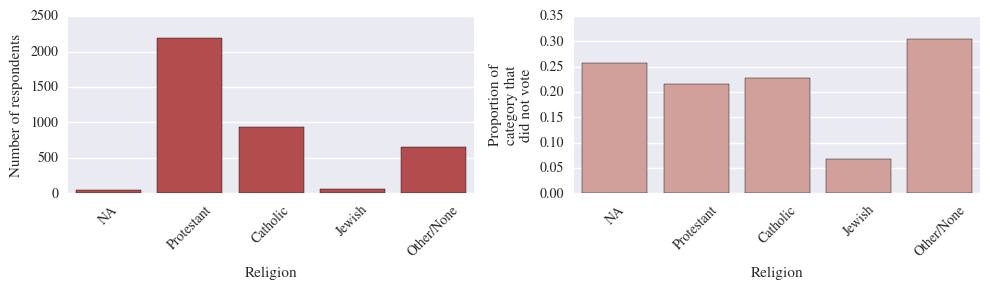

In [58]:
respondent_counts = []
NV_proportion = []
x = ['NA','Protestant','Catholic','Jewish','Other/None']

first_index = df.columns.get_loc('VCF0128_oh0')
last_index = df.columns.get_loc('VCF0128_oh4')
for index in range(first_index, last_index + 1):
    respondent_counts.append(sum(df.iloc[:,index] == 1))
    NV_proportion.append(sum((df.iloc[:,index] == 1) & (df.VCF0702 == 0)) / respondent_counts[-1])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
g1 = sns.barplot(x = x, y = respondent_counts, color = 'red',
            saturation = 0.4, ax = axes[0])
g1.set_ylabel('Number of respondents'); g1.set_xlabel('Religion')
for each in g1.get_xticklabels():
    each.set_rotation(45)

g2 = sns.barplot(x = x, y = NV_proportion, color = 'salmon',
            saturation = 0.4, ax = axes[1])
g2.set_ylabel('Proportion of\ncategory that\ndid not vote'); g2.set_xlabel('Religion')
plt.xticks(rotation = 45)
plt.tight_layout()

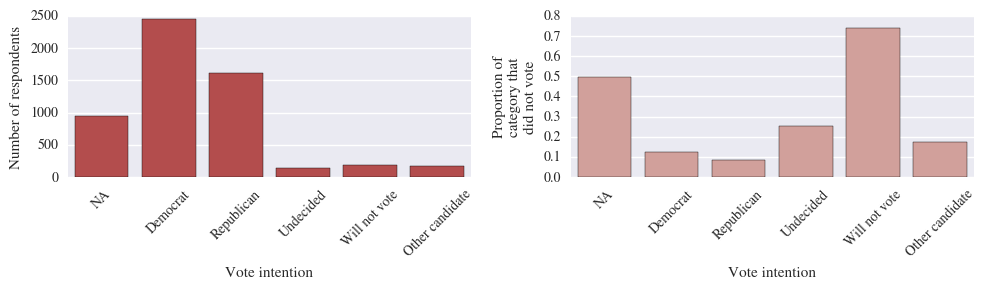

In [5]:
respondent_counts = []
NV_proportion = []
x = ['NA','Democrat','Republican','Undecided','Will not vote','Other candidate']

df = df_orig[df_orig.year == 2012]

first_index = df.columns.get_loc('VCF0713_oh0')
last_index = df.columns.get_loc('VCF0713_oh5')
for index in range(first_index, last_index + 1):
    respondent_counts.append(sum(df.iloc[:,index] == 1))
    NV_proportion.append(sum((df.iloc[:,index] == 1) & (df.VCF0702 == 0)) / respondent_counts[-1])

fig, axes = plt.subplots(1, 2, figsize = (10,3))
g1 = sns.barplot(x = x, y = respondent_counts, color = 'red',
            saturation = 0.4, ax = axes[0])
g1.set_ylabel('Number of respondents'); g1.set_xlabel('Vote intention')
for each in g1.get_xticklabels():
    each.set_rotation(45)

g2 = sns.barplot(x = x, y = NV_proportion, color = 'salmon',
            saturation = 0.4, ax = axes[1])
g2.set_ylabel('Proportion of\ncategory that\ndid not vote'); g2.set_xlabel('Vote intention')
plt.xticks(rotation = 45)
plt.tight_layout()